Importamos las librerias base que se utilizarán en el proyecto:

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

Se habilita el acceso a Google Drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importa además el conjunto de "stop words" del Español; pues este conjunto de palabras debe utilizarse para filtrar las palabras de la fuente de datos a usar en el proyecto.


In [3]:
import nltk
from nltk.corpus import stopwords

# Get spanish stopwords from NLTK library and store them in stop_words
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Se definen un conjunto preliminar de funciones necesarias para el desarrollo del proyecto

In [4]:
# Function to count number of upper case occurrences in a string
def n_upper_chars(text_string):
    return sum(map(str.isupper, text_string))

In [5]:
# Function to find the ratio of vocals from a word (string), meaning: number_of_vocals/word_length
def get_vocal_ratio(word):
  ratio = len(re.findall(r'[aeiou]', word))/len(word)

In [6]:
def find_pattern_positions(str_pattern, word):
  '''
  Function to find a certain RegEX pattern in a given word (string)
  
  Arguments:
  str_patter: RegEX pattern to search in word
  word: string to search patter into
  Returns: 
  positions: list of starting positions of provided pattern in string
  list with word (string) length, repeated as many times as the pattern was found
  '''
  iter = re.finditer(str_pattern, word)
  positions = [m.start(0) + 1 for m in iter]
  return positions, [len(word)]*len(positions)

In [7]:
# Funtion to replace letters with spanish accents with letters without accents
def remove_accents(texto):
  line_filtered = re.sub(r'[á]', 'a', texto)
  line_filtered = re.sub(r'[é]', 'e', line_filtered)
  line_filtered = re.sub(r'[í]', 'i', line_filtered)
  line_filtered = re.sub(r'[ó]', 'o', line_filtered)
  line_filtered = re.sub(r'[ú]', 'u', line_filtered)
  line_filtered = re.sub(r'[Á]', 'A', line_filtered)
  line_filtered = re.sub(r'[É]', 'E', line_filtered)
  line_filtered = re.sub(r'[Í]', 'I', line_filtered)
  line_filtered = re.sub(r'[Ó]', 'O', line_filtered)
  line_filtered = re.sub(r'[Ú]', 'U', line_filtered)
  return line_filtered

In [8]:
# Funtion to extract words from a given txt file, according to client's filtering guidelines
def get_wordlist_from_txt_file(file_address):
  word_list = []
  with open(file_address, "r") as txt_file:  
    for line in txt_file:

      line_filtered = remove_accents(line)

      line_filtered = re.sub("[^0-9a-zA-ZÑñ]+", " ", line_filtered)
      line_filtered = re.sub("[0-9]+", "", line_filtered)
      line_word_list = re.findall(r"\b[a-zA-ZÑñ]+\b", line_filtered)

      line_word_list = [word.lower() for word in line_word_list if n_upper_chars(word) <= 1]
      line_word_list = [word for word in line_word_list if word not in stop_words and len(word) > 3]
      word_list.extend(line_word_list)
    
  return word_list

Definimos una lista con la rutas de todos los archivos de la fuente de datos a procesar:

In [9]:
# Data source files addresses list
files_address_base = "/content/drive/MyDrive/Colab Notebooks/data/raw_texts/"
source_files_addresses = [
  files_address_base + "_C3_81frica.txt",
  files_address_base + "Aeropuerto.txt",
  files_address_base + "Agricultura.txt",
  files_address_base + "Alan_Turing.txt",
  files_address_base + "Antiguo_Egipto.txt",
  files_address_base + "Arte.txt",
  files_address_base + "Asia.txt",
  files_address_base + "Babilonia_(ciudad).txt",
  files_address_base + "Biblia.txt",
  files_address_base + "Biodiversidad.txt",
  files_address_base + "Capitalismo.txt",
  files_address_base + "Ciencia.txt",
  files_address_base + "Colombia.txt",
  files_address_base + "Consumo.txt",
  files_address_base + "Cristianismo.txt",
  files_address_base + "Cristo.txt",
  files_address_base + "Cultura.txt",
  files_address_base + "Democracia.txt",
  files_address_base + "Diccionario.txt",
  files_address_base + "Divina_comedia.txt",
  files_address_base + "Ecologismo.txt",
  files_address_base + "Energ_C3_ADa_nuclear.txt",
  files_address_base + "Enrique_VIII_de_Inglaterra.txt",
  files_address_base + "Escritura.txt",
  files_address_base + "Est_C3_A9tica.txt",
  files_address_base + "Estado.txt",
  files_address_base + "Estados_Unidos.txt",
  files_address_base + "Europa.txt",
  files_address_base + "Filosof_C3_ADa.txt",
  files_address_base + "Finanzas.txt",
  files_address_base + "Fruta.txt",
  files_address_base + "Gabriel_Garc_C3_ADa_M_C3_A1rquez.txt",
  files_address_base + "Gastronom_C3_ADa_de_M_C3_A9xico.txt",
  files_address_base + "George_Patton.txt",
  files_address_base + "Grecia.txt",
  files_address_base + "Guerra_Fr_C3_ADa.txt",
  files_address_base + "Henry_Ford.txt",
  files_address_base + "Holocausto.txt",
  files_address_base + "Homo_sapiens.txt",
  files_address_base + "Inteligencia_artificial.txt",
  files_address_base + "Italia.txt",
  files_address_base + "Jorge_Isaacs.txt",
  files_address_base + "Juda_C3_ADsmo.txt",
  files_address_base + "Juglar.txt",
  files_address_base + "Julio_Garavito.txt",
  files_address_base + "Liberalismo.txt",
  files_address_base + "Libro.txt",
  files_address_base + "Ludwig_van_Beethoven.txt",
  files_address_base + "Nevado_del_Ruiz.txt",
  files_address_base + "Nikola_Tesla.txt",
  files_address_base + "Odisea.txt",
  files_address_base + "Organizaci_C3_B3n_de_las_Naciones_Unidas.txt",
  files_address_base + "Per_C3_ADodo_helen_C3_ADstico.txt",
  files_address_base + "Pizza.txt",
  files_address_base + "Pueblos_germ_C3_A1nicos.txt",
  files_address_base + "Real_Academia_Espa_C3_B1ola.txt",
  files_address_base + "Reino_Unido.txt",
  files_address_base + "Revoluci_C3_B3n_Industrial.txt",
  files_address_base + "Rueda.txt",
  files_address_base + "Salsa_(g_C3_A9nero_musical).txt",
  files_address_base + "Saxof_C3_B3n.txt",
  files_address_base + "Segunda_Guerra_Mundial.txt",
  files_address_base + "Sublime.txt",
  files_address_base + "Thomas_Alva_Edison.txt",
  files_address_base + "Valle.txt"
]

# print(source_files_addresses)

Recorremos todos los archivos de la fuente de datos y extraemos las palabras de estos, siguiendo los lineamientos indicados por el cliente:

In [10]:
# Code to build a word list with all the words found in all data source text files. This complete word list is then used to get a set with unique words
raw_word_list = []
for address in source_files_addresses:
  raw_word_list.extend(get_wordlist_from_txt_file(address))

word_list = set(raw_word_list)
# print(word_list)

Se genera un mapa de las palabras extraídas de los archivos de la fuente de datos, para visualizar con mayor tamaño aquellas que se encontraron más frecuentemente

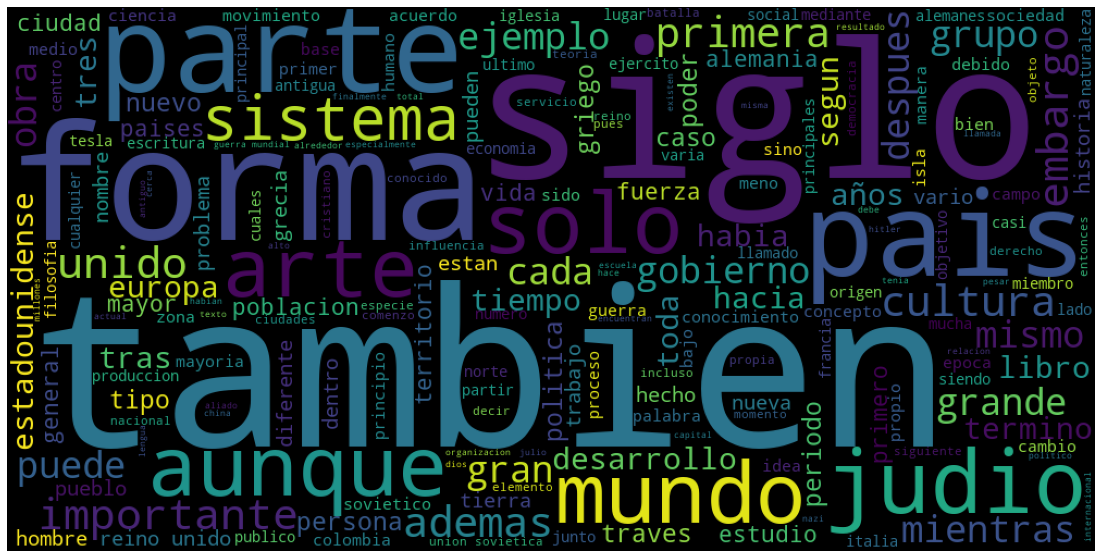

In [11]:
# Generate a word cloud from complete word list to present most frequent words in a larger size
from wordcloud import WordCloud
words_string=(" ").join(raw_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ahora, hacemos un DataFrame de pandas con la lista de palabras únicas, y estadíticas que podemos extraer a partir de ellas

In [12]:
word_list_df = pd.DataFrame({ 'words' : list(word_list) })

In [13]:
# with open('/content/drive/MyDrive/Colab Notebooks/data/alejandro_word_list.txt', 'w') as fp:
#   for item in word_list:
#     fp.write("%s," % item)

In [14]:
word_list_df['word_freq'] = [raw_word_list.count(word) for word in word_list_df['words']]

In [15]:
word_list_df['word_length'] = [len(word) for word in word_list_df['words']]
word_list_df['vocals_count'] = [len(re.findall(r'[aeiou]', word)) for word in word_list_df['words']]
word_list_df['consonants_count'] = [len(re.findall(r'[^aeiou]', word)) for word in word_list_df['words']]

In [16]:
# word_list_df['a_count'] = [len(re.findall(r'[a]', word)) for word in word_list_df['words']]
# word_list_df['e_count'] = [len(re.findall(r'[e]', word)) for word in word_list_df['words']]
# word_list_df['i_count'] = [len(re.findall(r'[i]', word)) for word in word_list_df['words']]
# word_list_df['o_count'] = [len(re.findall(r'[o]', word)) for word in word_list_df['words']]
# word_list_df['u_count'] = [len(re.findall(r'[u]', word)) for word in word_list_df['words']]

Construímos otra serie de funciones necesarias para el desarrollo del proyecto

In [17]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=8) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [18]:
def present_central_tendencies(df, variable, variable_name, unit):
  mean = df[variable].mean()
  median = df[variable].median()
  mode = df[variable].mode()[0]

  plt.figure(figsize=(12,6))
  plt.title("Histograma de " + variable_name)
  plt.xlabel(variable_name)
  plt.ylabel("Frecuencia de " + variable_name)
  graph = sns.histplot(data = df, x = variable, discrete = True)
  show_values_on_bars(graph, "v")
  plt.axvline(x = mean, color = "black", label = "Media")
  plt.axvline(x = median, color = "blue", label = "Mediana")
  plt.axvline(x = mode, color = "green", label = "Moda")
  plt.legend()
  plt.show()

  print("La media de " + variable_name + f" es: {mean} " + unit)
  print("La mediana de " + variable_name + f" es: {median} " + unit)
  print("La moda de " + variable_name + f" es: {mode} " + unit)


In [19]:
def present_dist(df, variable, variable_name, unit):
  median = df[variable].median()

  plt.figure(figsize=(12,6))
  plt.title("Dist. de densidad de probabilidad de " + variable_name)
  plt.xlabel(variable_name)
  plt.ylabel("Densidad de probabilidad")
  g = sns.kdeplot(data = df, x = variable, fill=True, bw_adjust=1.8, cut=3) 
  plt.axvline(x = median, color = "blue", label = "Mediana")
  plt.legend()
  plt.show()


In [20]:
def present_position_stats(df, variable, variable_name, unit):
  q1 = np.percentile(df[variable], 25)
  q2 = np.percentile(df[variable], 50)
  q3 = np.percentile(df[variable], 75)

  plt.figure(figsize=(12,6))
  plt.title("Diagrama de cajas de " + variable_name)
  plt.xlabel(variable_name)
  sns.boxplot(data = df, x = variable)
  plt.axvline(x = q1, color = "blue", label = "Cuartil 1 (25%)")
  plt.axvline(x = q2, color = "black", label = "Cuartil 2 (50%)")
  plt.axvline(x = q3, color = "green", label = "Cuartil 3 (75%)")
  plt.legend()
  plt.show()

  print("El cuartil 1 de " + variable_name + f" es: {q1} " + unit)
  print("El cuartil 2 de " + variable_name + f" es: {q2} " + unit)
  print("El cuartil 3 de " + variable_name + f" es: {q3} " + unit)

In [21]:
def present_dispersion_stats(df, variable, variable_name, unit):
  max = np.max(df[variable])
  min = np.min(df[variable])
  var = np.var(df[variable])
  std = np.std(df[variable])

  print("El rango de " + variable_name + f" es de: {max-min} [{min} a {max}] " + unit)
  print("La varianza de " + variable_name + f" es: {var} " + unit + " cuadrados/cuadradas")
  print("La desviación estándar de " + variable_name + f" es: {std} " + unit)

In [22]:
def present_position_by_length(df, variable_name):
  g = sns.displot(df, y="word_lengths", x="positions", binwidth=(1, .5), cbar=True, aspect=12/6)
  g.set_axis_labels(variable_name, "Longitudes de palabras")

In [23]:
def test_normality(series, var_name):
  res = stats.probplot(series, plot=plt)
  plt.title("Gráfico Q-Q normal")
  plt.xlabel("Cuantiles teóricos de dist. normal")
  plt.ylabel("Cuantiles de dist. prueba " + var_name)
  plt.show()

  W, p = stats.shapiro(series)
  print("Test de Shapiro-Wilk W: {0}, p-value: {1}".format(round(W, 3), p))
  skewness = stats.skew(series)
  print("Sesgo: {0}".format(round(skewness, 3)))
  kurtosis = stats.kurtosis(series)
  print("Curtosis: {0}".format(round(kurtosis, 3)))

Ahora, iniciamos analizando la distribución de las longitudes de las palabras encontradas:

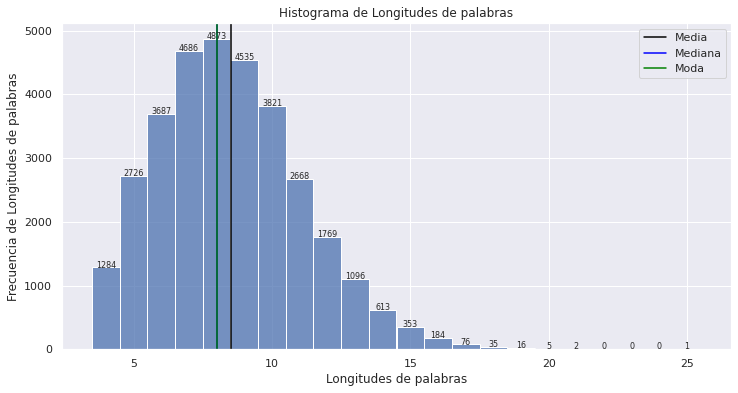

La media de Longitudes de palabras es: 8.502528522972556 caracteres
La mediana de Longitudes de palabras es: 8.0 caracteres
La moda de Longitudes de palabras es: 8 caracteres




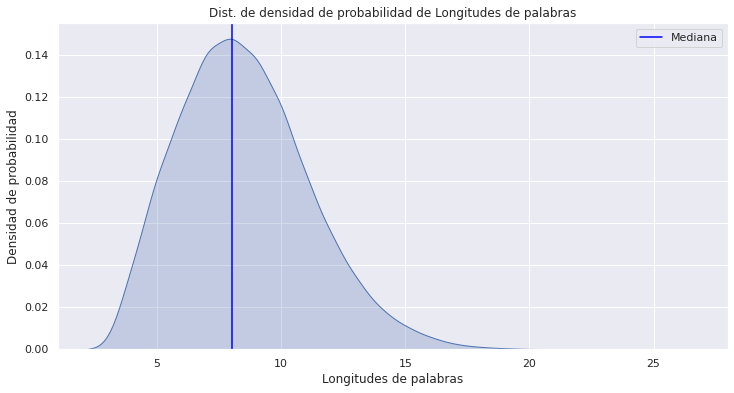

In [24]:
present_central_tendencies(word_list_df, 'word_length', 'Longitudes de palabras', 'caracteres')
print("\n")
present_dist(word_list_df, 'word_length', 'Longitudes de palabras', 'caracteres')

In [25]:
word_lengths_q1 = np.percentile(word_list_df['word_length'], 25)
word_lengths_q2 = np.percentile(word_list_df['word_length'], 50)
word_lengths_q3 = np.percentile(word_list_df['word_length'], 75)
word_lengths_p90 = np.percentile(word_list_df['word_length'], 90)

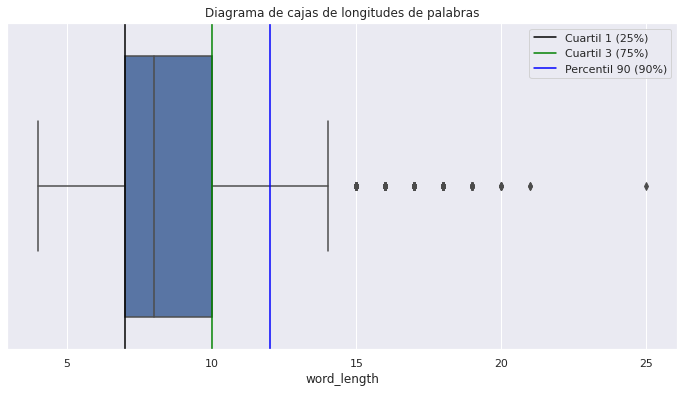

El cuartil 1 de la longitud de las palabras es: 7.0 caracteres
El cuartil 2 de la longitud de las palabras es: 8.0 caracteres
El cuartil 3 de la longitud de las palabras es: 10.0 caracteres
El percentil 90 de la longitud de las palabras es: 12.0 caracteres


In [26]:
plt.figure(figsize=(12,6))
plt.title("Diagrama de cajas de longitudes de palabras")
plt.xlabel("Longitudes de palabras")
sns.boxplot(data = word_list_df, x = 'word_length')
plt.axvline(x = word_lengths_q1, color = "black", label = "Cuartil 1 (25%)")
plt.axvline(x = word_lengths_q3, color = "green", label = "Cuartil 3 (75%)")
plt.axvline(x = word_lengths_p90, color = "blue", label = "Percentil 90 (90%)")
plt.legend()
plt.show()

print(f"El cuartil 1 de la longitud de las palabras es: {word_lengths_q1} caracteres")
print(f"El cuartil 2 de la longitud de las palabras es: {word_lengths_q2} caracteres")
print(f"El cuartil 3 de la longitud de las palabras es: {word_lengths_q3} caracteres")
print(f"El percentil 90 de la longitud de las palabras es: {word_lengths_p90} caracteres")

In [27]:
present_dispersion_stats(word_list_df, 'word_length', 'Longitudes de palabras', 'caracteres')

El rango de Longitudes de palabras es de: 21 [4 a 25] caracteres
La varianza de Longitudes de palabras es: 6.781908500188598 caracteres cuadrados/cuadradas
La desviación estándar de Longitudes de palabras es: 2.6042097650129103 caracteres


Ahora, analizamos la distribución de las vocales en las palabras:


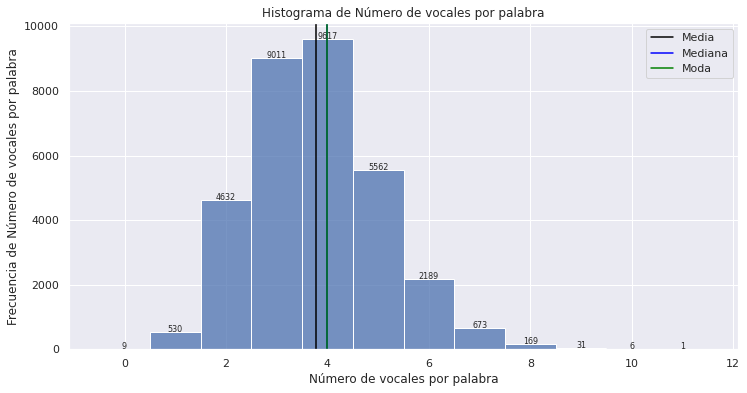

La media de Número de vocales por palabra es: 3.7820536540240517 
La mediana de Número de vocales por palabra es: 4.0 
La moda de Número de vocales por palabra es: 4 




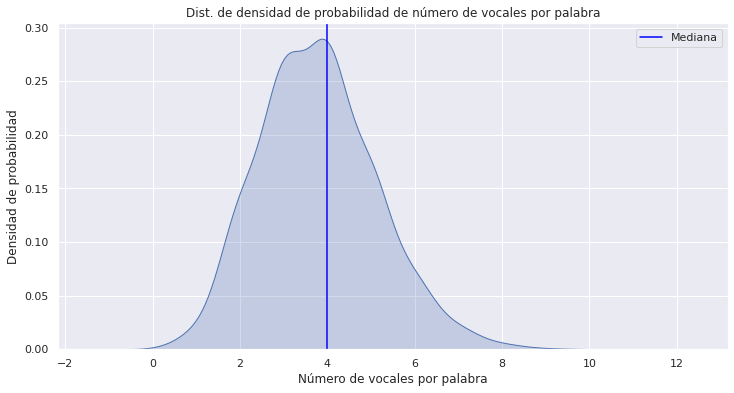



El rango de Número de vocales por palabra es de: 11 [0 a 11] 
La varianza de Número de vocales por palabra es: 1.6969335561715075  cuadrados/cuadradas
La desviación estándar de Número de vocales por palabra es: 1.3026640227516486 


In [28]:
present_central_tendencies(word_list_df, 'vocals_count', 'Número de vocales por palabra', '')
print("\n")
median = word_list_df['vocals_count'].median()
plt.figure(figsize=(12,6))
plt.title("Dist. de densidad de probabilidad de número de vocales por palabra")
plt.xlabel('Número de vocales por palabra')
plt.ylabel("Densidad de probabilidad")
g = sns.kdeplot(data = word_list_df, x = 'vocals_count', fill=True, bw_adjust=3, cut=3) 
plt.axvline(x = median, color = "blue", label = "Mediana")
plt.legend()
plt.show()
print("\n")
present_dispersion_stats(word_list_df, 'vocals_count', 'Número de vocales por palabra', '')

Revisamos estadísticos que nos indiquen si la distribución de las vocales en las palabras es normal:


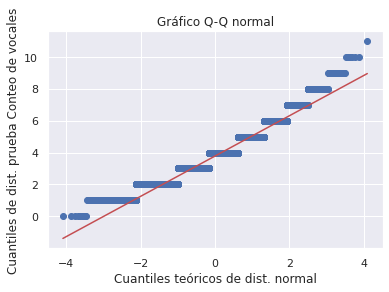

Test de Shapiro-Wilk W: 0.937, p-value: 0.0
Sesgo: 0.459
Curtosis: 0.311


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
test_normality(word_list_df['vocals_count'], 'Conteo de vocales')

Concluimos que **la distribución de la cantidad de vocales en las palabras no es normal.** Ahora, analizamos el comportamiento de esta variable, frente al comportamiento de la variable longitud de palabras:

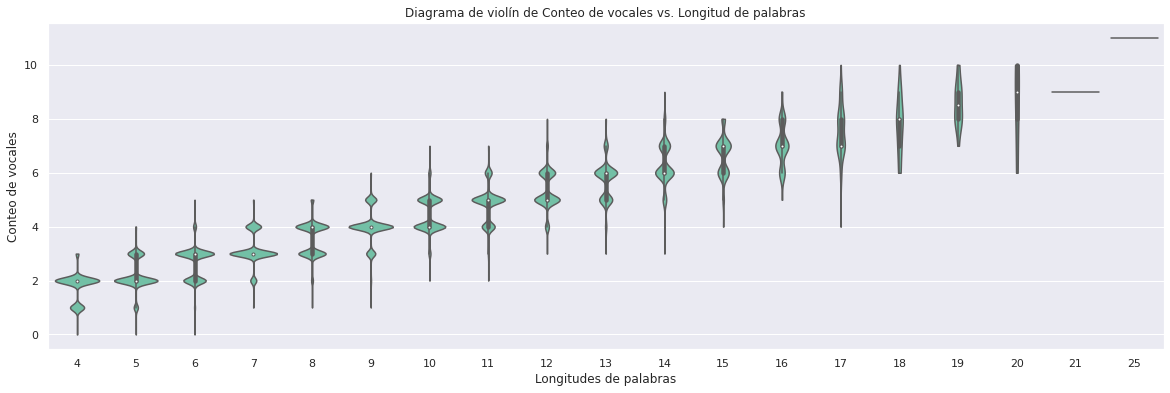

In [30]:
plt.figure(figsize=(20,6))
plt.title("Diagrama de violín de Conteo de vocales vs. Longitud de palabras")
g = sns.violinplot(data = word_list_df, x = "word_length", y = "vocals_count", cut = 0, color="mediumaquamarine")
g.set_xlabel("Longitudes de palabras")
g.set_ylabel("Conteo de vocales")
plt.show()

In [31]:
# g = sns.displot(word_list_df, x="word_length", y="vocals_count", binwidth=(1, .5), cbar=True, height=6, aspect=2)
# g.set_axis_labels("Longitudes de palabras", "Conteo de vocales")

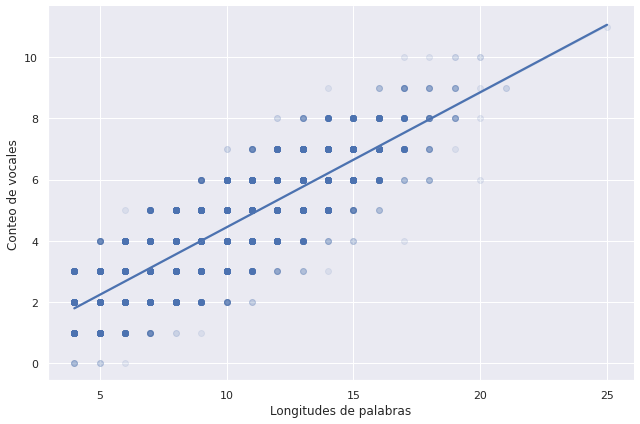

In [32]:
g = sns.lmplot(data = word_list_df, x="word_length", y="vocals_count", height=6, aspect=1.5, scatter_kws={'alpha': 0.1})
g.set_axis_labels("Longitudes de palabras", "Conteo de vocales")

Encontramos que el número de vocales en cada palabra, comparada con su longitud, sigue una tendencia lineal positiva fuerte. Más adelante, podríamos cuantificar esta correlación

Ahora, analizamos la distribución de las consonantes en las palabras:

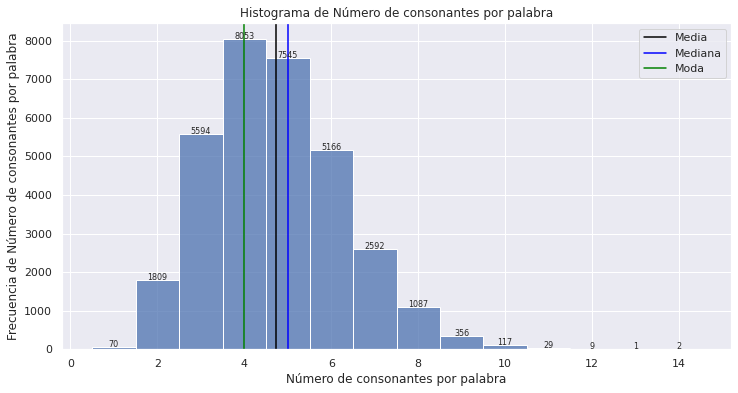

La media de Número de consonantes por palabra es: 4.7204748689485045 
La mediana de Número de consonantes por palabra es: 5.0 
La moda de Número de consonantes por palabra es: 4 




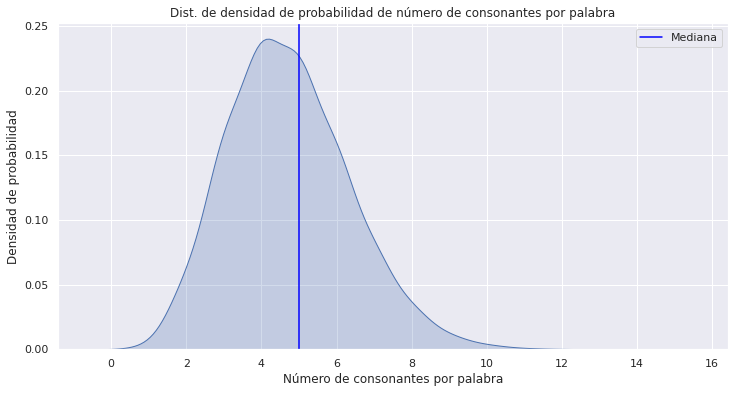



El rango de Número de consonantes por palabra es de: 13 [1 a 14] 
La varianza de Número de consonantes por palabra es: 2.495994594110953  cuadrados/cuadradas
La desviación estándar de Número de consonantes por palabra es: 1.5798717017881398 


In [33]:
present_central_tendencies(word_list_df, 'consonants_count', 'Número de consonantes por palabra', '')
print("\n")
median = word_list_df['consonants_count'].median()
plt.figure(figsize=(12,6))
plt.title("Dist. de densidad de probabilidad de número de consonantes por palabra")
plt.xlabel('Número de consonantes por palabra')
plt.ylabel("Densidad de probabilidad")
g = sns.kdeplot(data = word_list_df, x = 'consonants_count', fill=True, bw_adjust=2.7, cut=3) 
plt.axvline(x = median, color = "blue", label = "Mediana")
plt.legend()
plt.show()
print("\n")
present_dispersion_stats(word_list_df, 'consonants_count', 'Número de consonantes por palabra', '')

Revisamos estadísticos que nos indiquen si la distribución de las vocales en las palabras es normal:

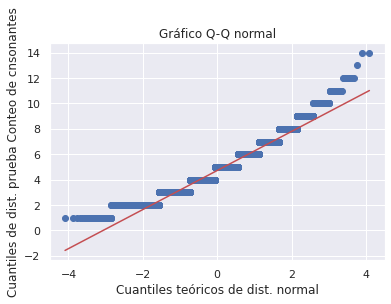

Test de Shapiro-Wilk W: 0.95, p-value: 0.0
Sesgo: 0.52
Curtosis: 0.334


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
test_normality(word_list_df['consonants_count'], 'Conteo de cnsonantes')

Concluimos que **la distribución de la cantidad de consonantes en las palabras no es normal.** Ahora, analizamos el comportamiento de esta variable, frente al comportamiento de la variable longitud de palabras:

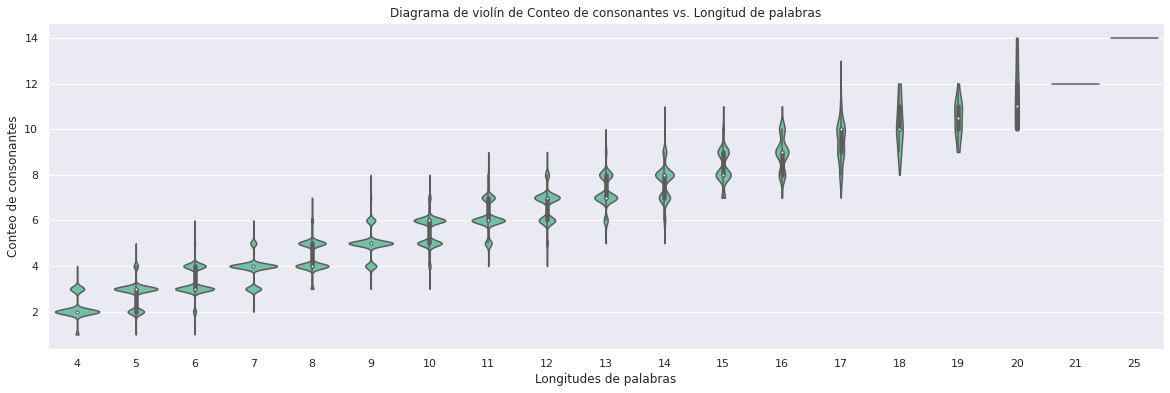

In [35]:
plt.figure(figsize=(20,6))
plt.title("Diagrama de violín de Conteo de consonantes vs. Longitud de palabras")
g = sns.violinplot(data = word_list_df, x = "word_length", y = "consonants_count", cut = 0, color="mediumaquamarine")
g.set_xlabel("Longitudes de palabras")
g.set_ylabel("Conteo de consonantes")
plt.show()

In [36]:
# g = sns.displot(word_list_df, x="word_length", y="consonants_count", binwidth=(1, .5), cbar=True, height=6, aspect=2)
# g.set_axis_labels("Longitudes de palabras", "Conteo de consonantes")

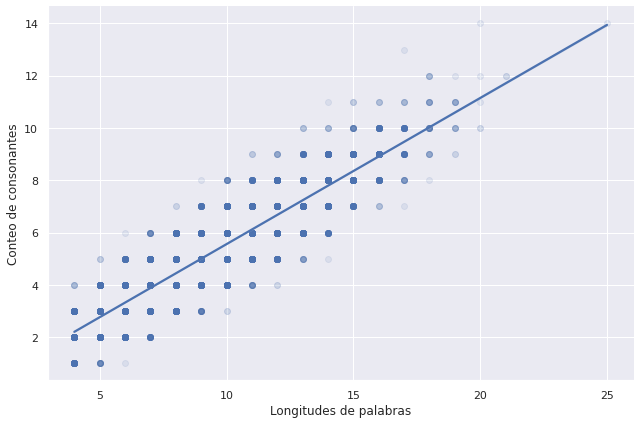

In [37]:
g = sns.lmplot(data = word_list_df, x="word_length", y="consonants_count", height=6, aspect=1.5, scatter_kws={'alpha': 0.1})
g.set_axis_labels("Longitudes de palabras", "Conteo de consonantes")

Encontramos que el número de consonantes en cada palabra, comparada con su longitud, sigue una tendencia lineal positiva fuerte. Ahora, cuantifiquemos las correlaciones identificadas entre las variables analizadas:

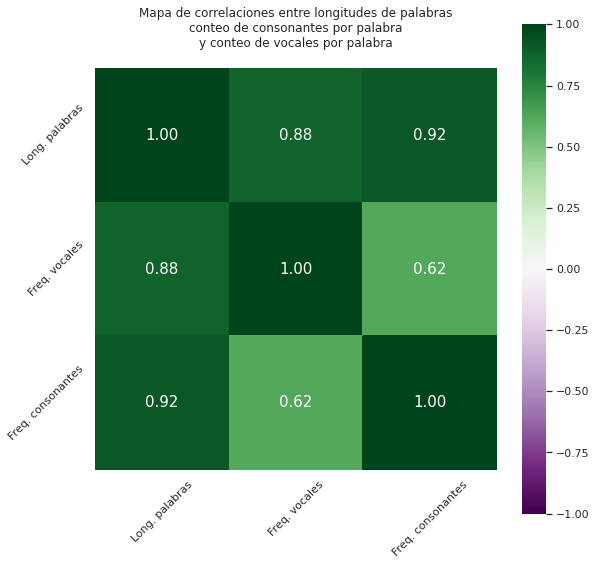

In [38]:
corr_data = word_list_df.loc[:, ('word_length', 'vocals_count', 'consonants_count')]
heatmap_labels = ['Long. palabras', 'Freq. vocales', 'Freq. consonantes']
plt.figure(figsize=(9,9))
# g = sns.heatmap(corr_data.corr(method='pearson'), square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
g = sns.heatmap(corr_data.corr(method='spearman'), square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
          xticklabels= heatmap_labels, yticklabels= heatmap_labels, cmap="PRGn", vmin=-1, vmax=1)

g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_yticklabels(g.get_yticklabels(), rotation = 45)
g.set(title = "Mapa de correlaciones entre longitudes de palabras\nconteo de consonantes por palabra\ny conteo de vocales por palabra\n")
plt.show()

El diagrama anterior presenta las correlaciones de Spearman entre las variables cantidad de vocales, cantidad de consonantes, y longitud de palabras. Se evidencia que la cantidad de vocales y la longitud de palabras, así como la cantidad de consonantes y la longitud de palabras, siguen una correlación positiva y fuerte. Otro hallazgo es que la cantidad de vocales, y la cantidad de consonantes por palabra también presentan correlación positiva, pero esta es más débil. La relación entre estas variables puede entenderse mejor a partir de la siguiente gráfica:

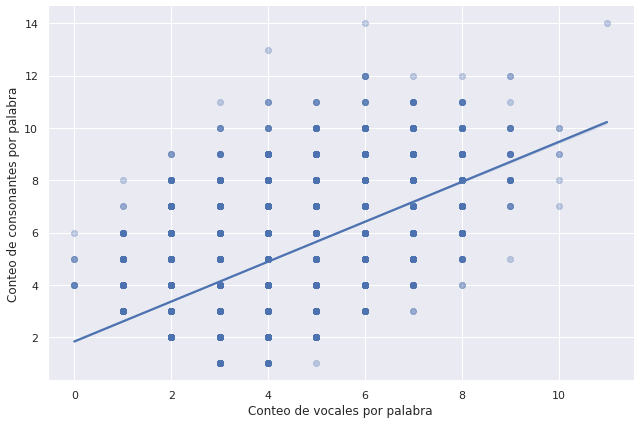

In [39]:
g = sns.lmplot(data = word_list_df, x="vocals_count", y="consonants_count", height=6, aspect=1.5, scatter_kws={'alpha': 0.3})
g.set_axis_labels("Conteo de vocales por palabra", "Conteo de consonantes por palabra")

Esto lo que significa es que el radio de consonantes/vocales, aunque creciente, de acuerdo a la longitud de las palabras, presenta mucha variabilidad en el rango de palabras con longitud intermedia (cercana a la media).

Ahora, listamos las posiciones en que se encuentra cada letra en el conjunto de palabras construído, y asociamos a cada posición, la longitud de la palabra en la que se encontró la letra: a partir de estas variables, podemos seguir extrayendo estadísticas y realizando análisis a partir de estas

In [40]:
a_positions, b_positions, c_positions, d_positions, e_positions, f_positions, g_positions, h_positions, i_positions, j_positions, k_positions, l_positions, m_positions, n_positions, ñ_positions, o_positions, p_positions, q_positions, r_positions, s_positions, t_positions, u_positions, v_positions, w_positions, x_positions, y_positions, z_positions = ({'positions' : [], 'word_lengths': []} for i in range(27))
for word in word_list_df['words']:
  
  positions, lengths = find_pattern_positions(r'a', word)
  a_positions['positions'].extend(positions)
  a_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'b', word)
  b_positions['positions'].extend(positions)
  b_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'c', word)
  c_positions['positions'].extend(positions)
  c_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'd', word)
  d_positions['positions'].extend(positions)
  d_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'e', word)
  e_positions['positions'].extend(positions)
  e_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'f', word)
  f_positions['positions'].extend(positions)
  f_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'g', word)
  g_positions['positions'].extend(positions)
  g_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'h', word)
  h_positions['positions'].extend(positions)
  h_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'i', word)
  i_positions['positions'].extend(positions)
  i_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'j', word)
  j_positions['positions'].extend(positions)
  j_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'k', word)
  k_positions['positions'].extend(positions)
  k_positions['word_lengths'].extend(lengths)
  
  positions, lengths = find_pattern_positions(r'l', word)
  l_positions['positions'].extend(positions)
  l_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'm', word)
  m_positions['positions'].extend(positions)
  m_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'n', word)
  n_positions['positions'].extend(positions)
  n_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'ñ', word)
  ñ_positions['positions'].extend(positions)
  ñ_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'o', word)
  o_positions['positions'].extend(positions)
  o_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'p', word)
  p_positions['positions'].extend(positions)
  p_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'q', word)
  q_positions['positions'].extend(positions)
  q_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'r', word)
  r_positions['positions'].extend(positions)
  r_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r's', word)
  s_positions['positions'].extend(positions)
  s_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r't', word)
  t_positions['positions'].extend(positions)
  t_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'u', word)
  u_positions['positions'].extend(positions)
  u_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'v', word)
  v_positions['positions'].extend(positions)
  v_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'w', word)
  w_positions['positions'].extend(positions)
  w_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'x', word)
  x_positions['positions'].extend(positions)
  x_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'y', word)
  y_positions['positions'].extend(positions)
  y_positions['word_lengths'].extend(lengths)

  positions, lengths = find_pattern_positions(r'z', word)
  z_positions['positions'].extend(positions)
  z_positions['word_lengths'].extend(lengths)

Una vez obtenidas las posiciones en que se ubica daca letra en todas las palabras de nuestro conjunto, podemos extraer las estadísticas a mencionar a continuación:

* Cantidad total de veces que se presenta una letra en todas las palabras del conjunto.
* Media de las posiciones de cada letra.
* Mediana de las posiciones de cada letra.
* Moda de las posiciones de cada letra.
* Desv. Estándar de las posiciones de cada letra.
* Cuartil 1 de la dist. de las posiciones de cada letra.
* Cuartil 3 de la dist. de las posiciones de cada letra.

In [86]:
letters_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters_dict_lists = [a_positions, b_positions, c_positions, d_positions, e_positions, f_positions, g_positions, h_positions, i_positions, j_positions, k_positions, l_positions, m_positions, n_positions, ñ_positions, o_positions, p_positions, q_positions, r_positions, s_positions, t_positions, u_positions, v_positions, w_positions, x_positions, y_positions, z_positions]
letters_stats = pd.DataFrame({'letter' : letters_list})

In [87]:
letters_freq = []
positions_mean = []
positions_median = []
positions_mode = []
positions_std = []
positions_var = []
positions_min = []
positions_max = []
positions_q1 = []
positions_q3 = []

for i in range(27):
  letters_freq.append(len(letters_dict_lists[i]['positions']))
  positions_mean.append(round(pd.DataFrame(letters_dict_lists[i])['positions'].mean(), 2)) 
  positions_median.append(pd.DataFrame(letters_dict_lists[i])['positions'].median())
  positions_mode.append(pd.DataFrame(letters_dict_lists[i])['positions'].mode()[0])
  positions_min.append(np.min(pd.DataFrame(letters_dict_lists[i])['positions']))
  positions_max.append(np.max(pd.DataFrame(letters_dict_lists[i])['positions']))
  positions_std.append(round(np.std(pd.DataFrame(letters_dict_lists[i])['positions']), 2))
  positions_var.append(round(np.var(pd.DataFrame(letters_dict_lists[i])['positions']), 2))
  positions_q1.append(np.percentile(pd.DataFrame(letters_dict_lists[i])['positions'], 25))
  positions_q3.append(np.percentile(pd.DataFrame(letters_dict_lists[i])['positions'], 75))

letters_stats['letters_freq'] = letters_freq
letters_stats['positions_mean'] = positions_mean
letters_stats['positions_var'] = positions_var
letters_stats['positions_std'] = positions_std
letters_stats['positions_mode'] = positions_mode
# letters_stats['positions_min'] = positions_min
# letters_stats['positions_max'] = positions_max
letters_stats['positions_range'] = list(np.subtract(positions_max, positions_min))
letters_stats['positions_q1'] = positions_q1
letters_stats['positions_median'] = positions_median
letters_stats['positions_q3'] = positions_q3


Una vez obtenidas estas estadísticas, las podemos presentar en una tabla:

In [88]:
letters_stats.sort_values('letters_freq', ascending=False, ignore_index=True)

,letter,letters_freq,positions_mean,positions_var,positions_std,positions_mode,positions_range,positions_q1,positions_median,positions_q3
0,a,35862,5.62,9.53,3.09,2,22,3.0,6.0,8.0
1,e,27468,4.89,10.07,3.17,2,18,2.0,4.0,7.0
2,i,26036,5.44,7.60,2.76,4,20,4.0,5.0,7.0
3,o,25322,5.99,10.63,3.26,2,24,3.0,6.0,8.0
4,r,21340,4.77,6.95,2.64,3,15,3.0,5.0,6.0
5,n,20218,5.93,9.92,3.15,3,23,3.0,6.0,8.0
6,s,19517,6.31,13.51,3.68,3,20,3.0,6.0,9.0
7,t,14964,5.37,8.55,2.92,4,21,3.0,5.0,7.0
8,c,14735,4.48,9.01,3.00,1,16,1.0,4.0,7.0
9,d,11743,5.52,10.57,3.25,1,20,3.0,6.0,8.0


Ahora, analicemos la distribución que siguen las vocales y las consonantes en las palabras:

In [44]:
vocals_positions = {'positions' : [], 'word_lengths': []}
consonants_positions = {'positions' : [], 'word_lengths': []}
for i in range(27):
  if letters_stats['letter'][i] in ['a', 'e', 'i', 'o', 'u']:
    vocals_positions['positions'].extend(letters_dict_lists[i]['positions'])
    vocals_positions['word_lengths'].extend(letters_dict_lists[i]['word_lengths'])
  else:
    consonants_positions['positions'].extend(letters_dict_lists[i]['positions'])
    consonants_positions['word_lengths'].extend(letters_dict_lists[i]['word_lengths'])

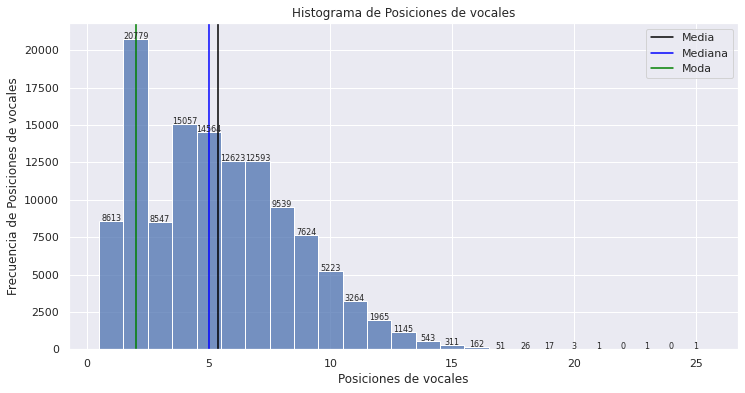

La media de Posiciones de vocales es: 5.388595375534031 
La mediana de Posiciones de vocales es: 5.0 
La moda de Posiciones de vocales es: 2 




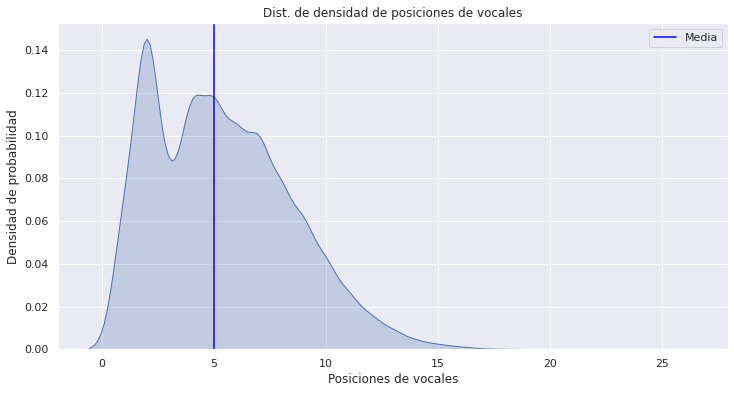



El rango de Posiciones de vocales es de: 24 [1 a 25] 
La varianza de Posiciones de vocales es: 9.420366298236448  cuadrados/cuadradas
La desviación estándar de Posiciones de vocales es: 3.069261523271754 




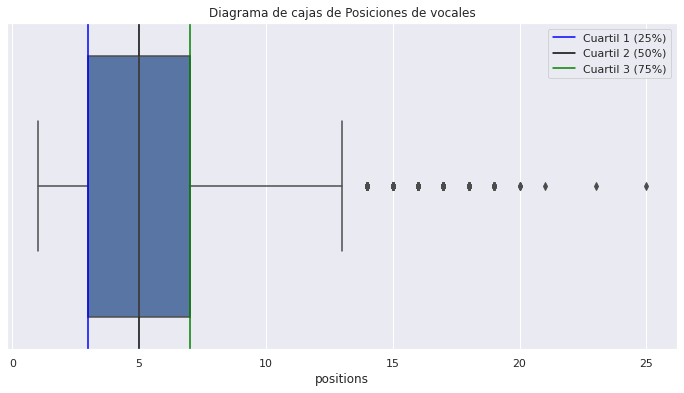

El cuartil 1 de Posiciones de vocales es: 3.0 
El cuartil 2 de Posiciones de vocales es: 5.0 
El cuartil 3 de Posiciones de vocales es: 7.0 




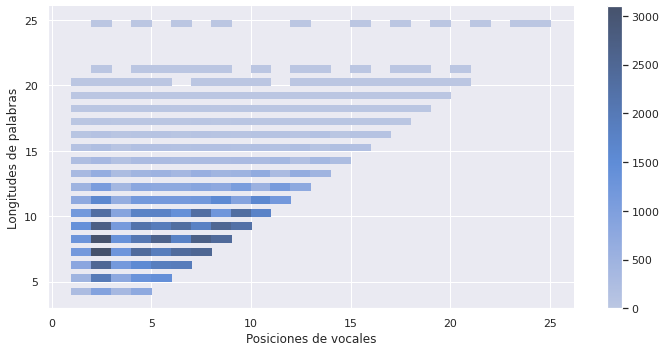

In [45]:
present_central_tendencies(pd.DataFrame(vocals_positions), 'positions', 'Posiciones de vocales', '')

print("\n")
median = pd.DataFrame(vocals_positions)['positions'].median()
plt.figure(figsize=(12,6))
plt.title("Dist. de densidad de posiciones de vocales")
plt.xlabel('Posiciones de vocales')
plt.ylabel("Densidad de probabilidad")
g = sns.kdeplot(data = pd.DataFrame(vocals_positions), x = 'positions', fill=True, bw_adjust=1.8, cut=3)
plt.axvline(x = median, color = "blue", label = "Media")
plt.legend()
plt.show()

print("\n")
present_dispersion_stats(pd.DataFrame(vocals_positions), 'positions', 'Posiciones de vocales', '')
print("\n")
present_position_stats(pd.DataFrame(vocals_positions), 'positions', 'Posiciones de vocales', '')
print("\n")
present_position_by_length(pd.DataFrame(vocals_positions), 'Posiciones de vocales')

Revisamos estadísticos que nos indiquen si la distribución de las posiciones de las vocales en las palabras sigue una distribución normal:

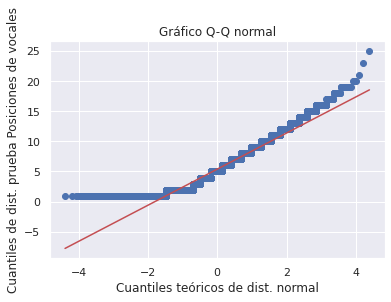

Test de Shapiro-Wilk W: 0.949, p-value: 0.0
Sesgo: 0.584
Curtosis: -0.097


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
test_normality(pd.DataFrame(vocals_positions)['positions'], 'Posiciones de vocales')

Concluimos que **la distribución de las posiciones de las vocales en las palabras no es normal.**

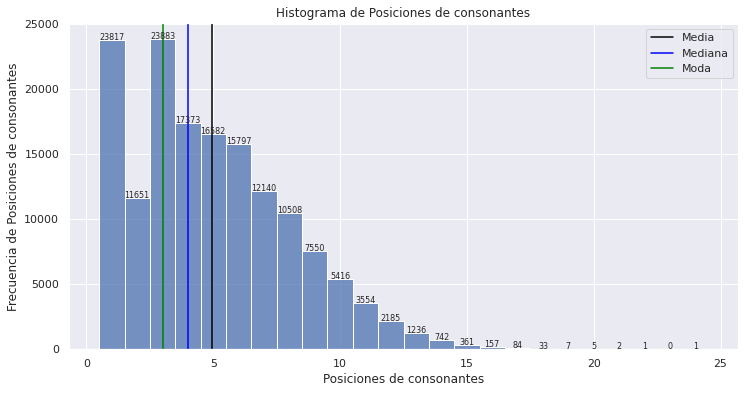

La media de Posiciones de consonantes es: 4.958983571218604 
La mediana de Posiciones de consonantes es: 4.0 
La moda de Posiciones de consonantes es: 3 




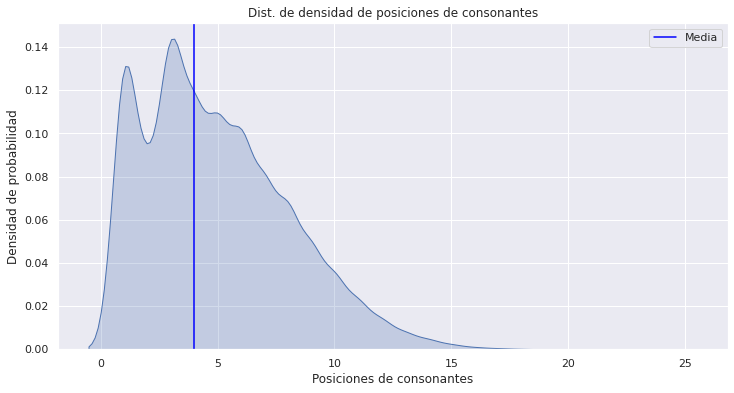



El rango de Posiciones de consonantes es de: 23 [1 a 24] 
La varianza de Posiciones de consonantes es: 9.565610333106976  cuadrados/cuadradas
La desviación estándar de Posiciones de consonantes es: 3.092832089381345 




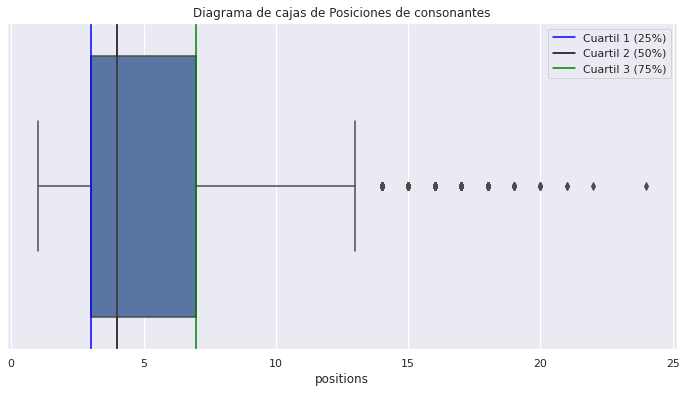

El cuartil 1 de Posiciones de consonantes es: 3.0 
El cuartil 2 de Posiciones de consonantes es: 4.0 
El cuartil 3 de Posiciones de consonantes es: 7.0 




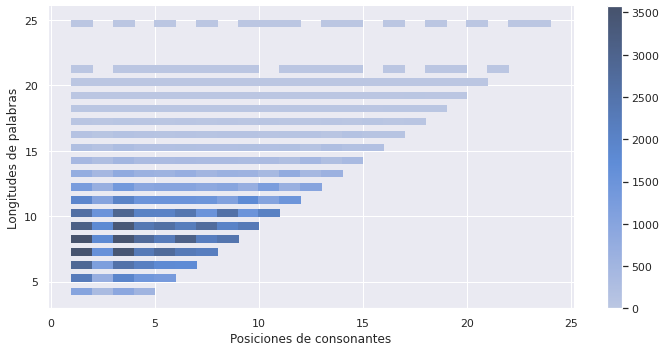

In [47]:
present_central_tendencies(pd.DataFrame(consonants_positions), 'positions', 'Posiciones de consonantes', '')

print("\n")
median = pd.DataFrame(consonants_positions)['positions'].median()
plt.figure(figsize=(12,6))
plt.title("Dist. de densidad de posiciones de consonantes")
plt.xlabel('Posiciones de consonantes')
plt.ylabel("Densidad de probabilidad")
g = sns.kdeplot(data = pd.DataFrame(consonants_positions), x = 'positions', fill=True, bw_adjust=1.8, cut=3)
plt.axvline(x = median, color = "blue", label = "Media")
plt.legend()
plt.show()

print("\n")
present_dispersion_stats(pd.DataFrame(consonants_positions), 'positions', 'Posiciones de consonantes', '')
print("\n")
present_position_stats(pd.DataFrame(consonants_positions), 'positions', 'Posiciones de consonantes', '')
print("\n")
present_position_by_length(pd.DataFrame(consonants_positions), 'Posiciones de consonantes')

Revisamos estadísticos que nos indiquen si la distribución de las posiciones de las consonantes en las palabras sigue una distribución normal:

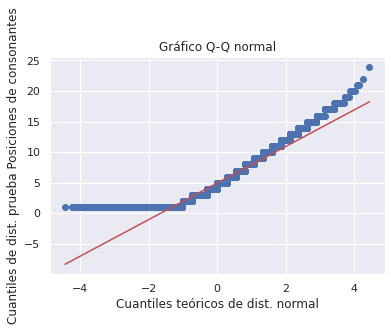

Test de Shapiro-Wilk W: 0.937, p-value: 0.0
Sesgo: 0.712
Curtosis: 0.111


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
test_normality(pd.DataFrame(consonants_positions)['positions'], 'Posiciones de consonantes')

Concluimos que **la distribución de las posiciones de las consonantes en las palabras no es normal.** A partir de los resultados anteriores, podemos revisar si las distribuciones de las variables analizadas son homogéneas. Para esto, utilizamos una prueba de Chi cuadrado, de 2 muestras independientes:

In [49]:
def test_kolmogorov_2samp(sample1, sample2): # El único drawback de estas pruebas es que asume que muestras a comparar son de datos continuos
  Dm, p = stats.ks_2samp(sample1, sample2)
  print("KS test Dm: {0}, p-value: {1}".format(round(Dm, 3), round(p, 3)))

In [50]:
def test_chi_sqd_independence(sample1_freq, sample2_freq): 
  obs = np.array([sample1_freq, sample2_freq])
  chi2, p, dof, ex = stats.chi2_contingency(obs)
  print("Chi2: {0}, p-value: {1}, DOF: {2}".format(chi2, p, dof))

In [51]:
df_consonants_positions = pd.DataFrame(consonants_positions)
df_vocals_positions = pd.DataFrame(vocals_positions)

sample1 = list(df_consonants_positions['positions'][df_consonants_positions['positions'] < 14].value_counts().sort_index())
sample2 = list(df_vocals_positions['positions'][df_vocals_positions['positions'] < 14].value_counts().sort_index())

test_chi_sqd_independence(sample1, sample2)

Chi2: 14535.442484437363, p-value: 0.0, DOF: 12


A partir de la prueba de hipótesis realizada anteriormente, concluímos que las distribuciones de las posiciones de consonantes y vocales son distintas.

Ahora, analicemos las distribuciones de las posiciones de cada letra por individual, y la relación entre estas posiciones y las longitudes de las palabras:

In [52]:
def present_letter_position_dist(df, letra):
  print("\n")
  median = df['positions'].median()
  plt.figure(figsize=(12,6))
  plt.title("Dist. de densidad de posiciones de letra " + letra)
  plt.xlabel('Posiciones de letra ' + letra)
  plt.ylabel("Densidad de probabilidad")
  g = sns.kdeplot(data = df, x = 'positions', fill=True, bw_adjust=1.8, cut=3)
  plt.axvline(x = median, color = "blue", label = "Media")
  plt.legend()
  plt.show()

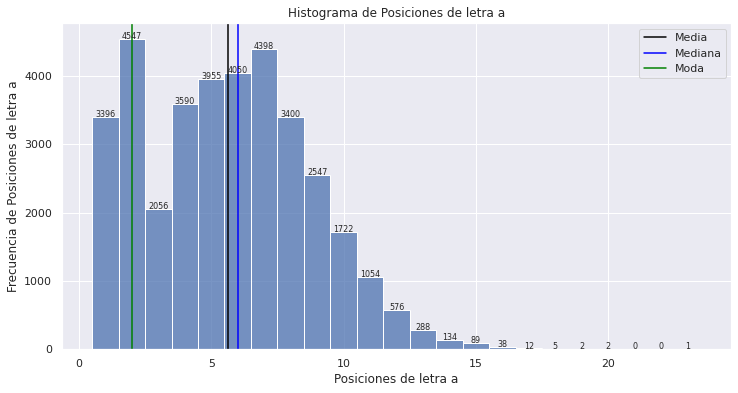

La media de Posiciones de letra a es: 5.623947353744911 posición
La mediana de Posiciones de letra a es: 6.0 posición
La moda de Posiciones de letra a es: 2 posición




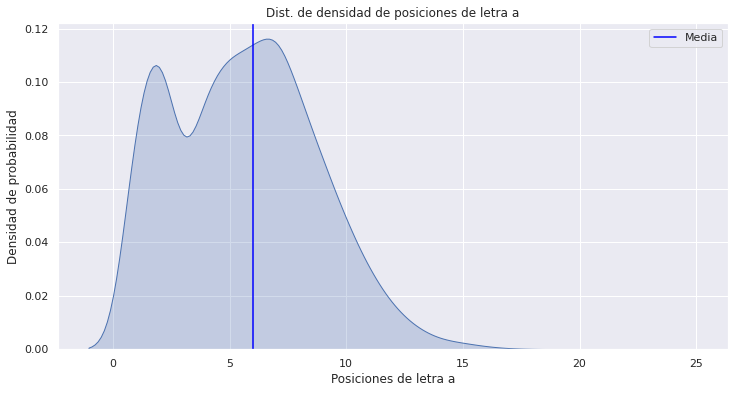



El rango de Posiciones de letra a es de: 22 [1 a 23] posiciones
La varianza de Posiciones de letra a es: 9.532278010501477 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra a es: 3.087438746032296 posiciones




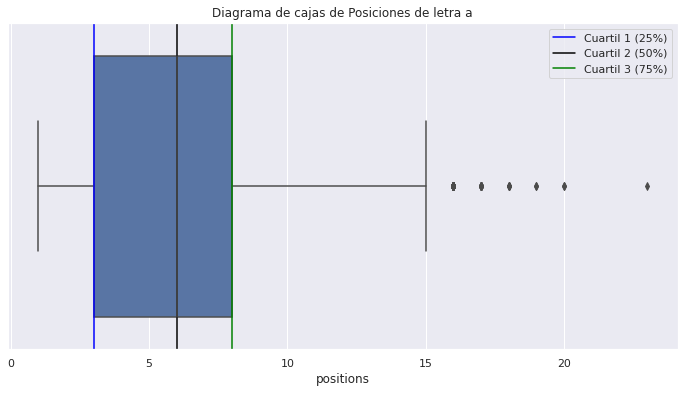

El cuartil 1 de Posiciones de letra a es: 3.0 posición
El cuartil 2 de Posiciones de letra a es: 6.0 posición
El cuartil 3 de Posiciones de letra a es: 8.0 posición




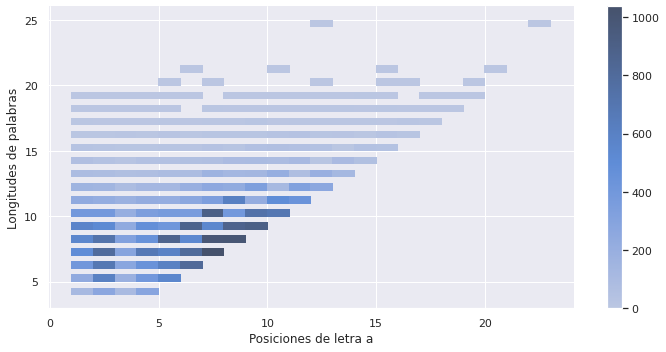

In [53]:
present_central_tendencies(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posición')
present_letter_position_dist(pd.DataFrame(a_positions), 'a')
print("\n")
present_dispersion_stats(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(a_positions), 'positions', 'Posiciones de letra a', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(a_positions), 'Posiciones de letra a')

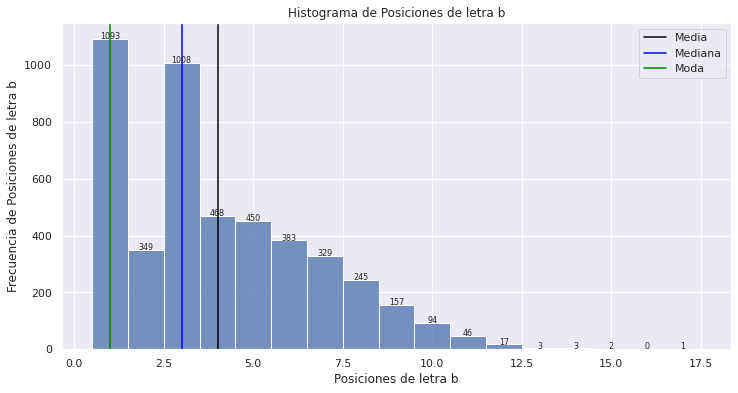

La media de Posiciones de letra b es: 4.020869191049914 posición
La mediana de Posiciones de letra b es: 3.0 posición
La moda de Posiciones de letra b es: 1 posición




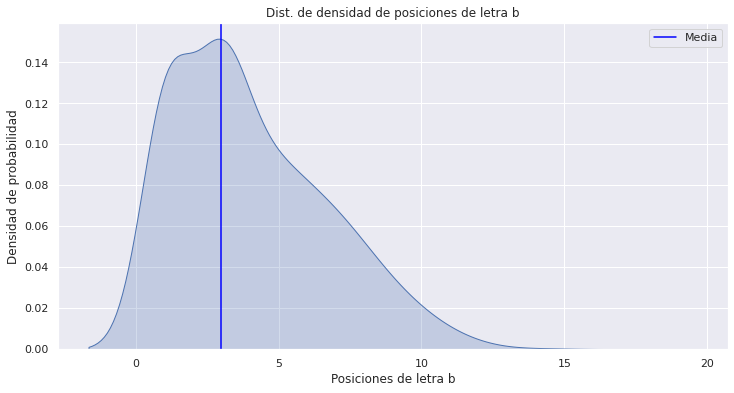



El rango de Posiciones de letra b es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra b es: 7.036784786675594 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra b es: 2.6526938735322614 posiciones




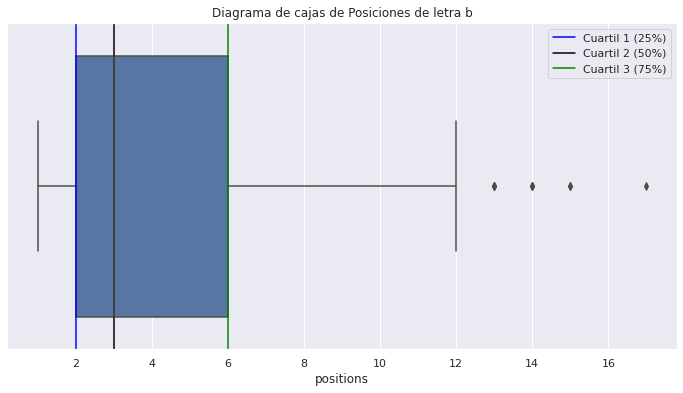

El cuartil 1 de Posiciones de letra b es: 2.0 posición
El cuartil 2 de Posiciones de letra b es: 3.0 posición
El cuartil 3 de Posiciones de letra b es: 6.0 posición




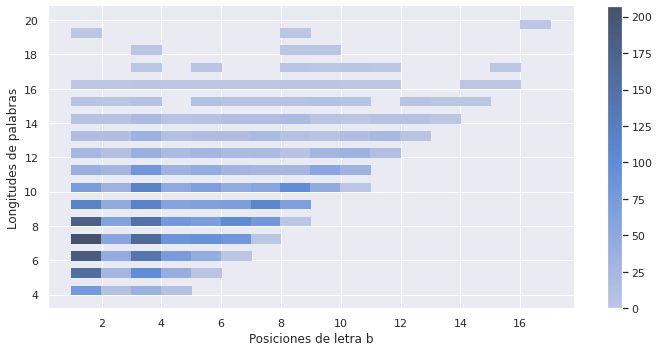

In [54]:
present_central_tendencies(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posición')
present_letter_position_dist(pd.DataFrame(b_positions), 'b')
print("\n")
present_dispersion_stats(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(b_positions), 'positions', 'Posiciones de letra b', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(b_positions), 'Posiciones de letra b')

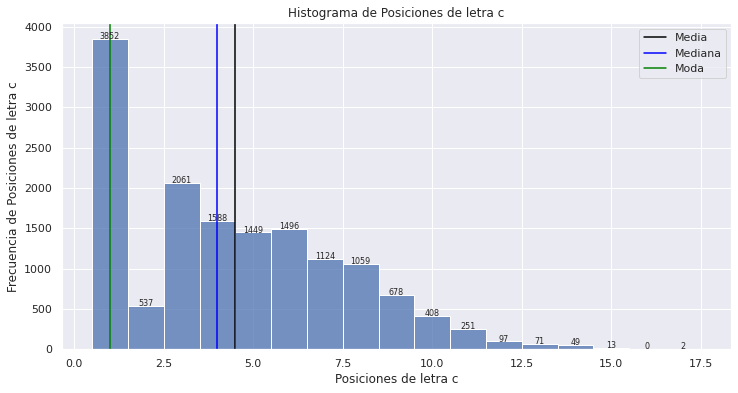

La media de Posiciones de letra c es: 4.4768917543264335 posición
La mediana de Posiciones de letra c es: 4.0 posición
La moda de Posiciones de letra c es: 1 posición




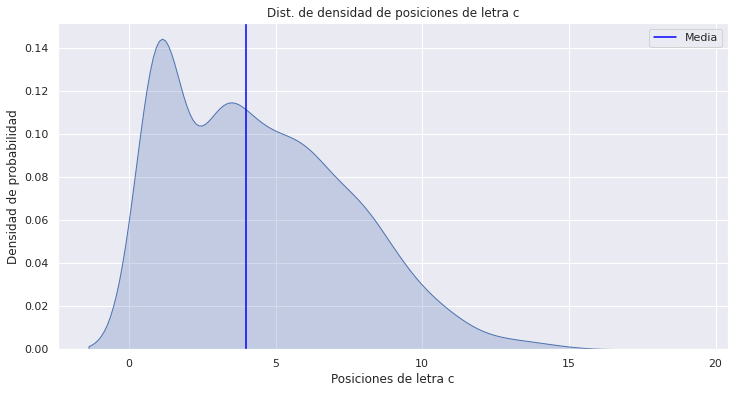



El rango de Posiciones de letra c es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra c es: 9.007525052076561 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra c es: 3.0012539132963343 posiciones




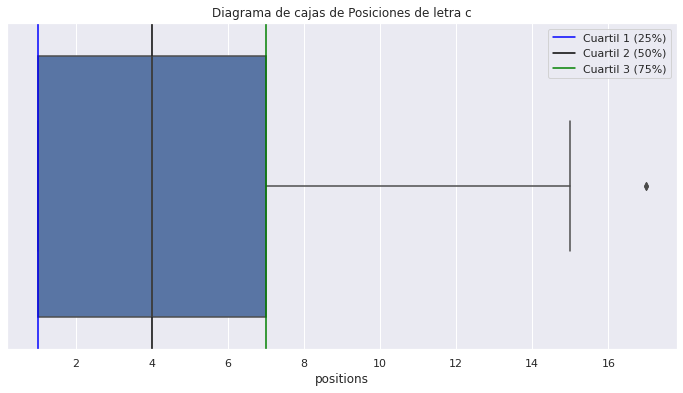

El cuartil 1 de Posiciones de letra c es: 1.0 posición
El cuartil 2 de Posiciones de letra c es: 4.0 posición
El cuartil 3 de Posiciones de letra c es: 7.0 posición




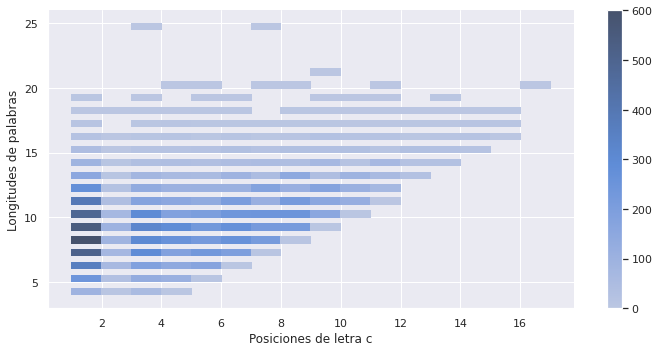

In [55]:
present_central_tendencies(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posición')
present_letter_position_dist(pd.DataFrame(c_positions), 'c')
print("\n")
present_dispersion_stats(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(c_positions), 'positions', 'Posiciones de letra c', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(c_positions), 'Posiciones de letra c')

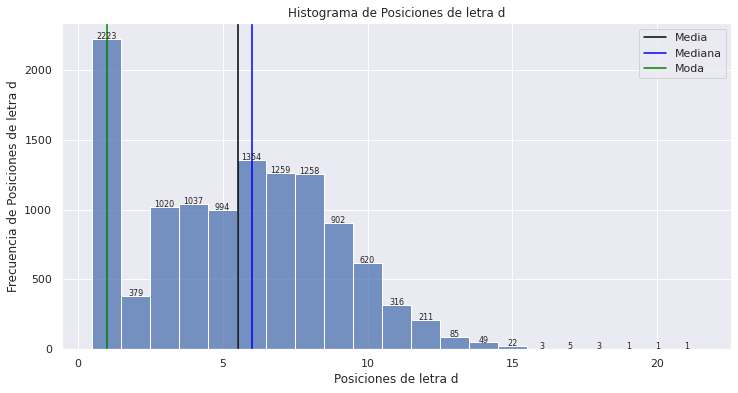

La media de Posiciones de letra d es: 5.5227795282295835 posición
La mediana de Posiciones de letra d es: 6.0 posición
La moda de Posiciones de letra d es: 1 posición




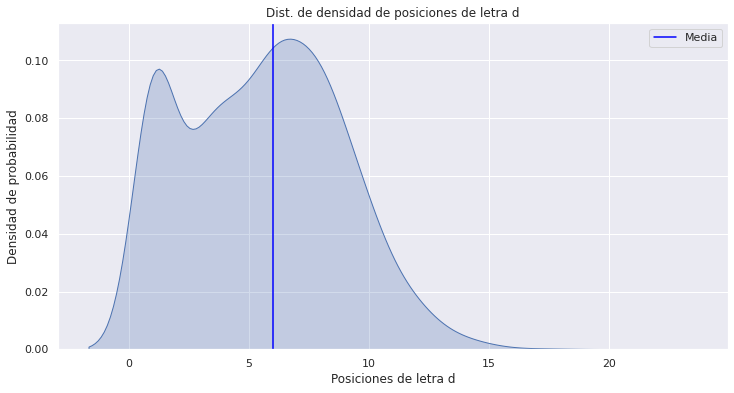



El rango de Posiciones de letra d es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra d es: 10.569842159260716 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra d es: 3.2511293667371524 posiciones




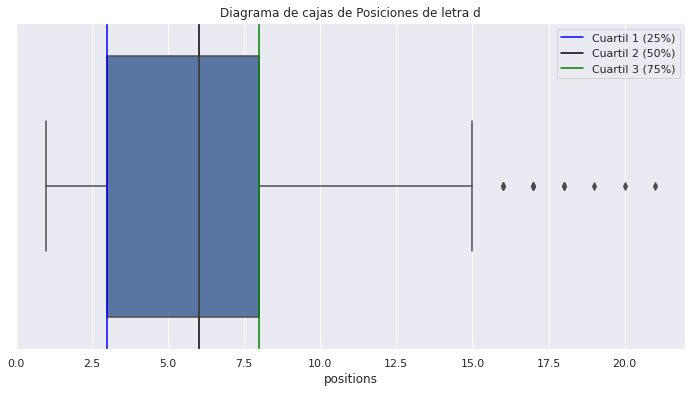

El cuartil 1 de Posiciones de letra d es: 3.0 posición
El cuartil 2 de Posiciones de letra d es: 6.0 posición
El cuartil 3 de Posiciones de letra d es: 8.0 posición




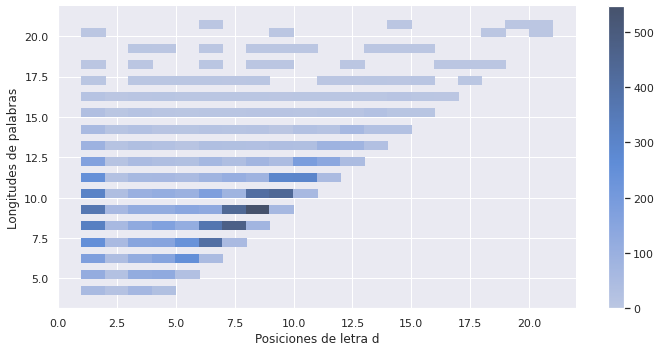

In [56]:
present_central_tendencies(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posición')
present_letter_position_dist(pd.DataFrame(d_positions), 'd')
print("\n")
present_dispersion_stats(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(d_positions), 'positions', 'Posiciones de letra d', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(d_positions), 'Posiciones de letra d')

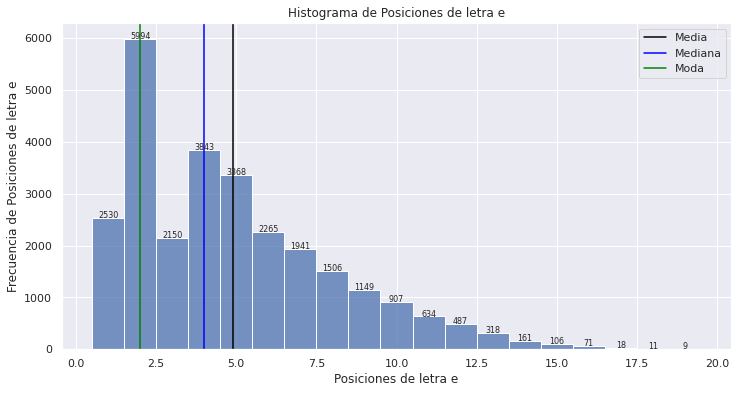

La media de Posiciones de letra e es: 4.89380369884957 posición
La mediana de Posiciones de letra e es: 4.0 posición
La moda de Posiciones de letra e es: 2 posición




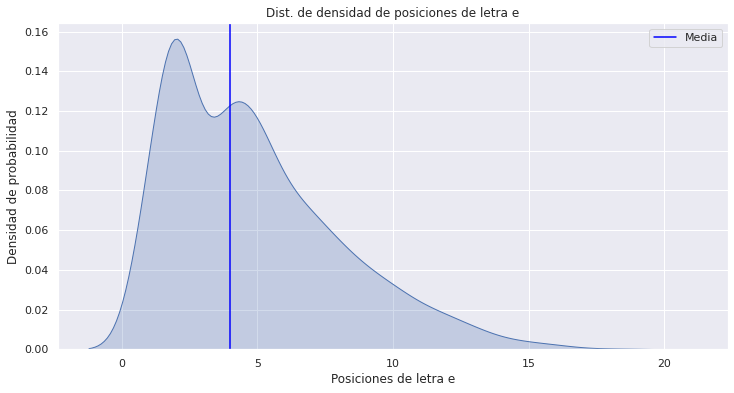



El rango de Posiciones de letra e es de: 18 [1 a 19] posiciones
La varianza de Posiciones de letra e es: 10.073075046947144 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra e es: 3.1738108083102787 posiciones




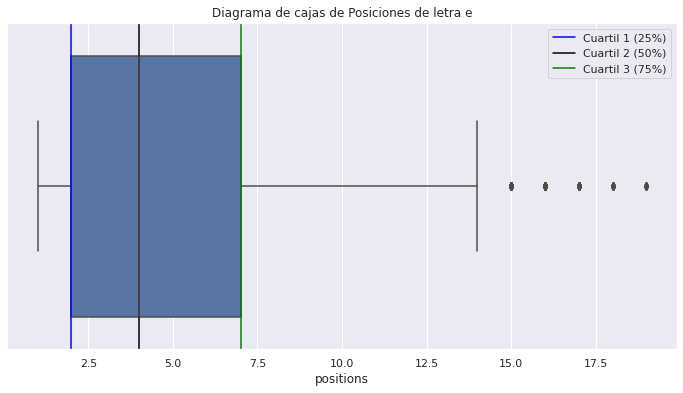

El cuartil 1 de Posiciones de letra e es: 2.0 posición
El cuartil 2 de Posiciones de letra e es: 4.0 posición
El cuartil 3 de Posiciones de letra e es: 7.0 posición




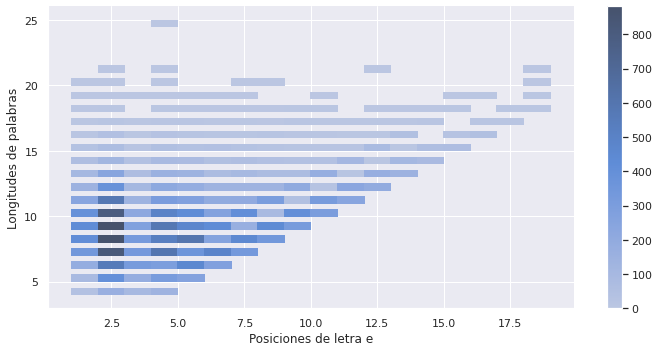

In [57]:
present_central_tendencies(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posición')
present_letter_position_dist(pd.DataFrame(e_positions), 'e')
print("\n")
present_dispersion_stats(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(e_positions), 'positions', 'Posiciones de letra e', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(e_positions), 'Posiciones de letra e')

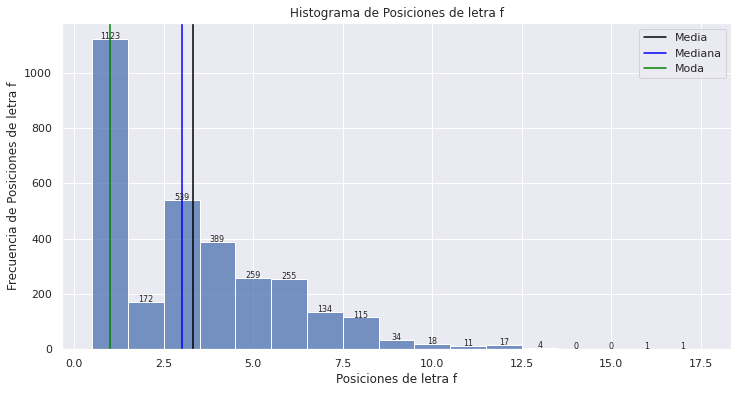

La media de Posiciones de letra f es: 3.3264973958333335 posición
La mediana de Posiciones de letra f es: 3.0 posición
La moda de Posiciones de letra f es: 1 posición




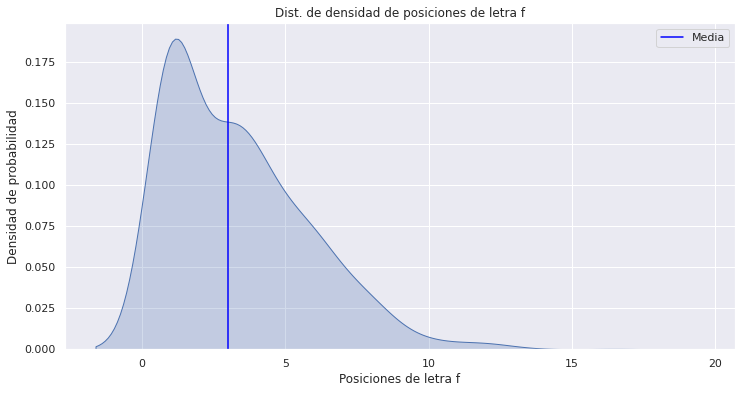



El rango de Posiciones de letra f es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra f es: 5.8683343463473845 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra f es: 2.4224645191101115 posiciones




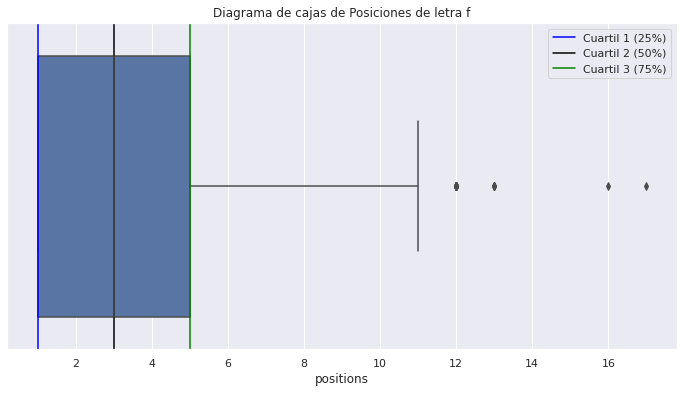

El cuartil 1 de Posiciones de letra f es: 1.0 posición
El cuartil 2 de Posiciones de letra f es: 3.0 posición
El cuartil 3 de Posiciones de letra f es: 5.0 posición




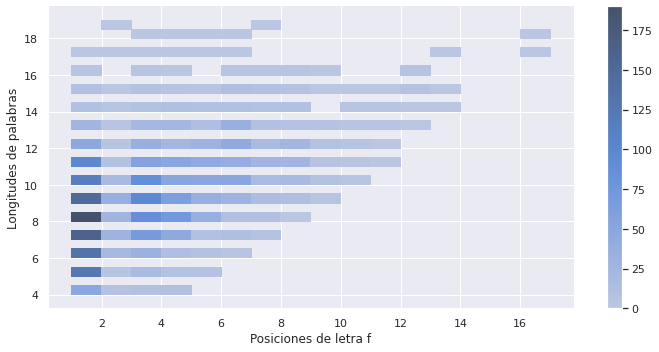

In [58]:
present_central_tendencies(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posición')
present_letter_position_dist(pd.DataFrame(f_positions), 'f')
print("\n")
present_dispersion_stats(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(f_positions), 'positions', 'Posiciones de letra f', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(f_positions), 'Posiciones de letra f')

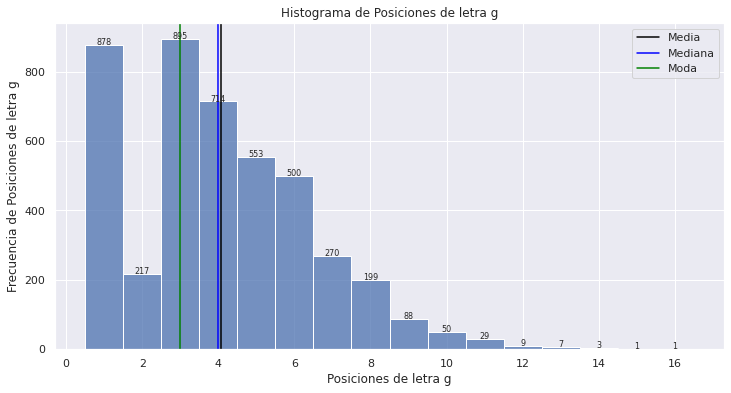

La media de Posiciones de letra g es: 4.074082464884459 posición
La mediana de Posiciones de letra g es: 4.0 posición
La moda de Posiciones de letra g es: 3 posición




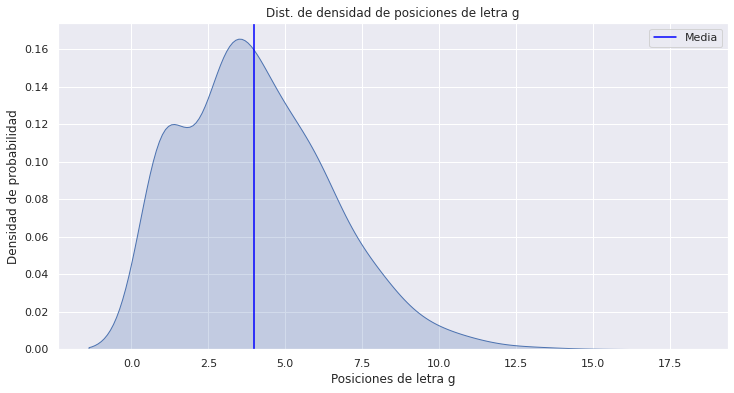



El rango de Posiciones de letra g es de: 15 [1 a 16] posiciones
La varianza de Posiciones de letra g es: 5.6494732745769785 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra g es: 2.3768620646930647 posiciones




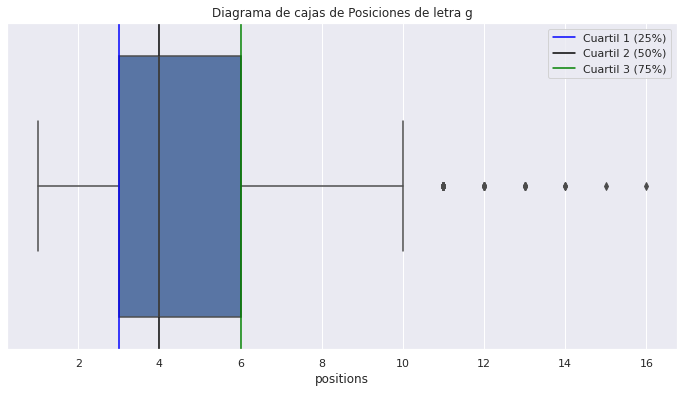

El cuartil 1 de Posiciones de letra g es: 3.0 posición
El cuartil 2 de Posiciones de letra g es: 4.0 posición
El cuartil 3 de Posiciones de letra g es: 6.0 posición




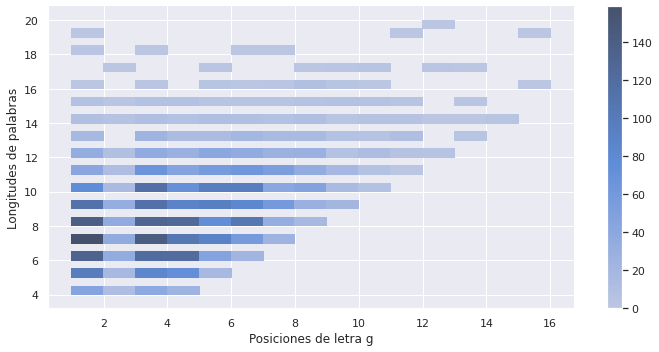

In [59]:
present_central_tendencies(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posición')
present_letter_position_dist(pd.DataFrame(g_positions), 'g')
print("\n")
present_dispersion_stats(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(g_positions), 'positions', 'Posiciones de letra g', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(g_positions), 'Posiciones de letra g')

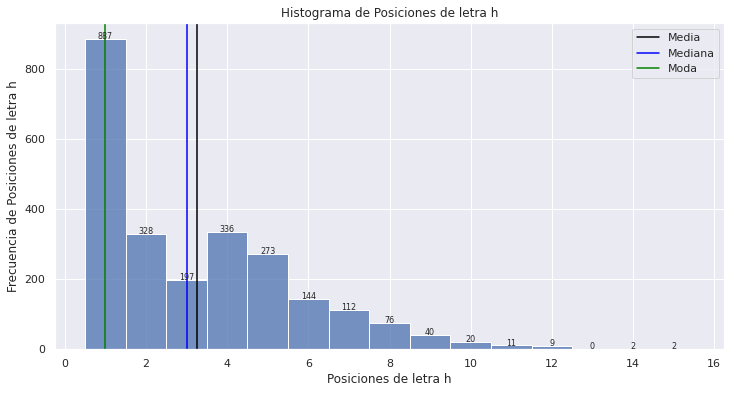

La media de Posiciones de letra h es: 3.2605662700041034 posición
La mediana de Posiciones de letra h es: 3.0 posición
La moda de Posiciones de letra h es: 1 posición




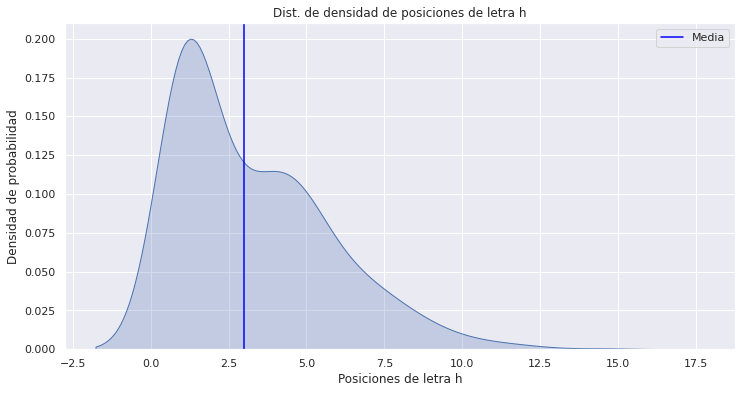



El rango de Posiciones de letra h es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra h es: 5.953853269818381 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra h es: 2.440051899000999 posiciones




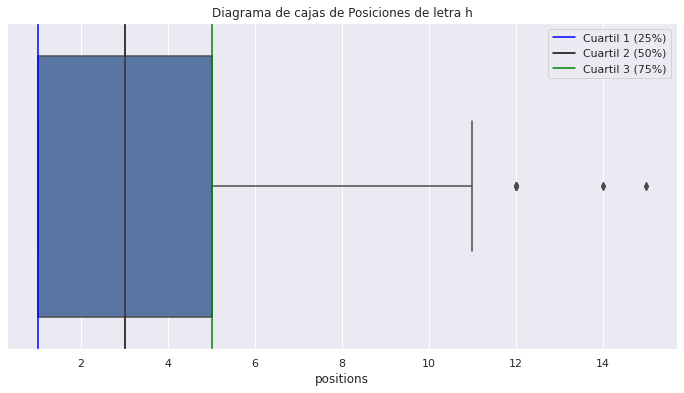

El cuartil 1 de Posiciones de letra h es: 1.0 posición
El cuartil 2 de Posiciones de letra h es: 3.0 posición
El cuartil 3 de Posiciones de letra h es: 5.0 posición




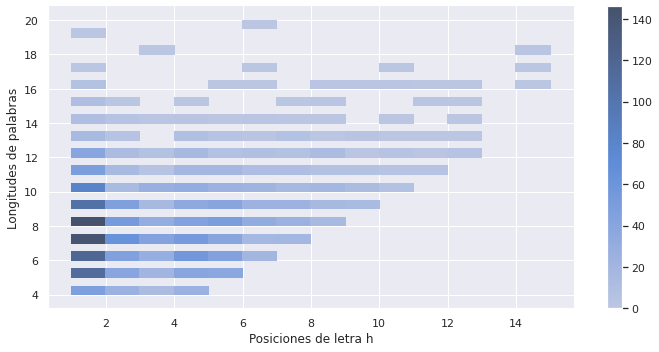

In [60]:
present_central_tendencies(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posición')
present_letter_position_dist(pd.DataFrame(h_positions), 'h')
print("\n")
present_dispersion_stats(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(h_positions), 'positions', 'Posiciones de letra h', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(h_positions), 'Posiciones de letra h')

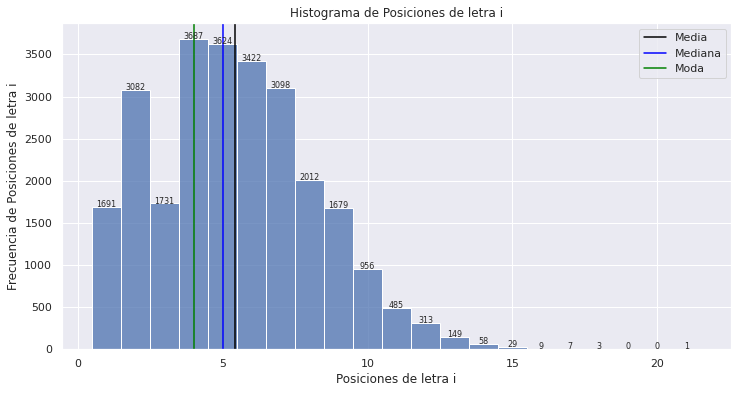

La media de Posiciones de letra i es: 5.435320325702873 posición
La mediana de Posiciones de letra i es: 5.0 posición
La moda de Posiciones de letra i es: 4 posición




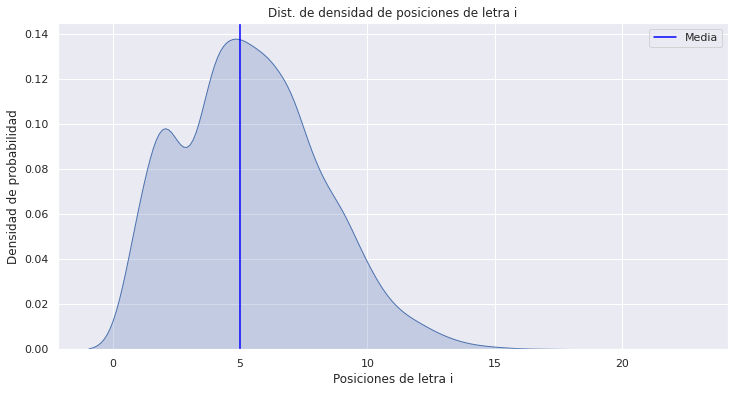



El rango de Posiciones de letra i es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra i es: 7.60286063252741 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra i es: 2.7573285318451646 posiciones




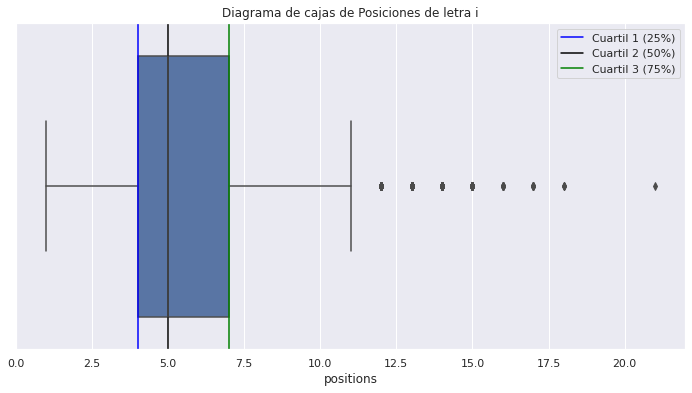

El cuartil 1 de Posiciones de letra i es: 4.0 posición
El cuartil 2 de Posiciones de letra i es: 5.0 posición
El cuartil 3 de Posiciones de letra i es: 7.0 posición




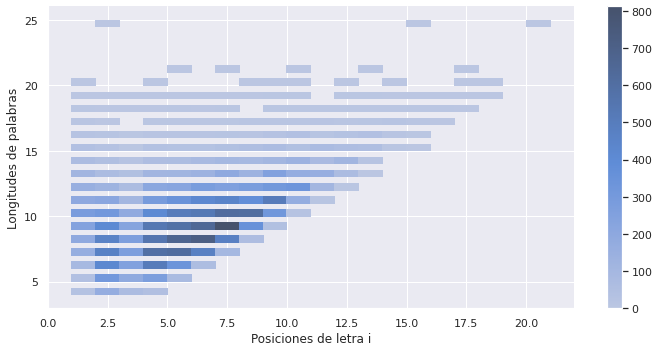

In [61]:
present_central_tendencies(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posición')
present_letter_position_dist(pd.DataFrame(i_positions), 'i')
print("\n")
present_dispersion_stats(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(i_positions), 'positions', 'Posiciones de letra i', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(i_positions), 'Posiciones de letra i')

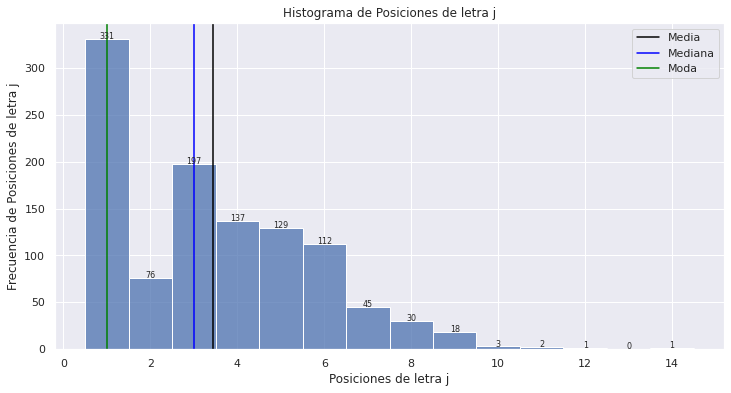

La media de Posiciones de letra j es: 3.4510166358595193 posición
La mediana de Posiciones de letra j es: 3.0 posición
La moda de Posiciones de letra j es: 1 posición




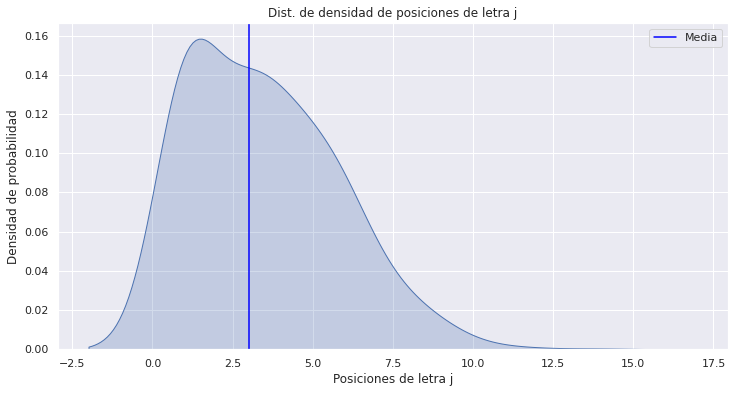



El rango de Posiciones de letra j es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra j es: 5.023940740943211 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra j es: 2.241414897100314 posiciones




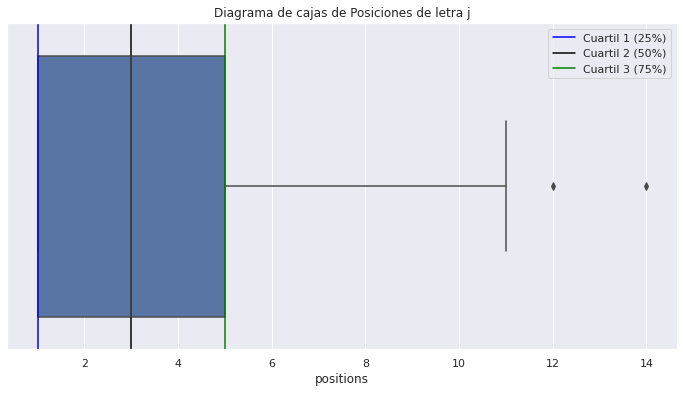

El cuartil 1 de Posiciones de letra j es: 1.0 posición
El cuartil 2 de Posiciones de letra j es: 3.0 posición
El cuartil 3 de Posiciones de letra j es: 5.0 posición




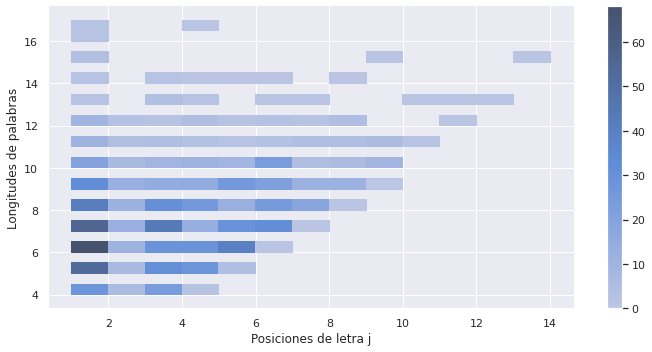

In [62]:
present_central_tendencies(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posición')
present_letter_position_dist(pd.DataFrame(j_positions), 'j')
print("\n")
present_dispersion_stats(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(j_positions), 'positions', 'Posiciones de letra j', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(j_positions), 'Posiciones de letra j')

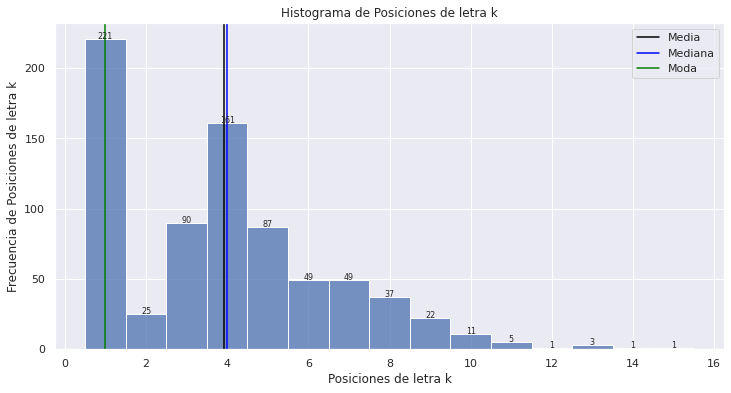

La media de Posiciones de letra k es: 3.926605504587156 posición
La mediana de Posiciones de letra k es: 4.0 posición
La moda de Posiciones de letra k es: 1 posición




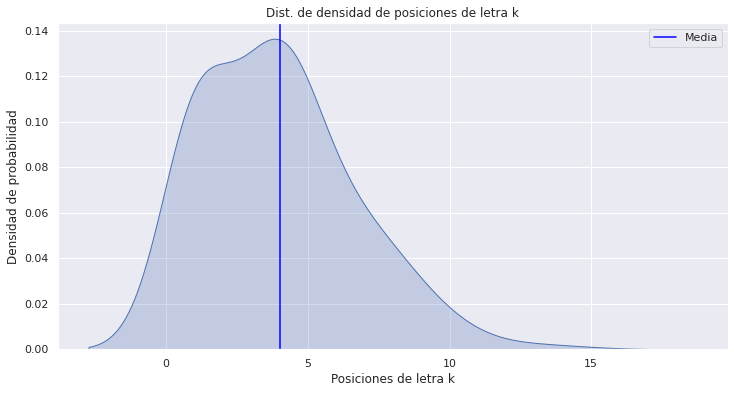



El rango de Posiciones de letra k es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra k es: 6.82816501737468 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra k es: 2.6130757771971864 posiciones




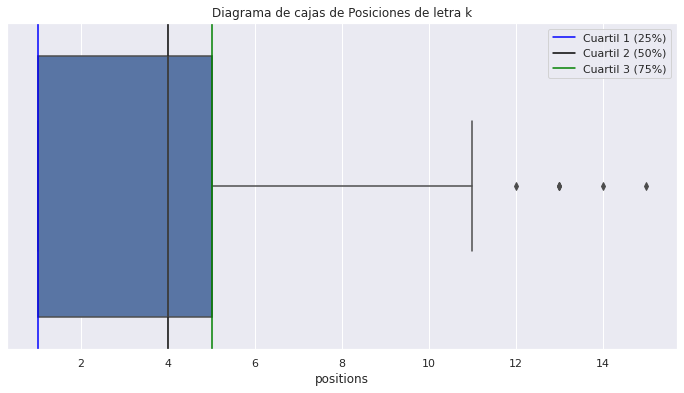

El cuartil 1 de Posiciones de letra k es: 1.0 posición
El cuartil 2 de Posiciones de letra k es: 4.0 posición
El cuartil 3 de Posiciones de letra k es: 5.0 posición




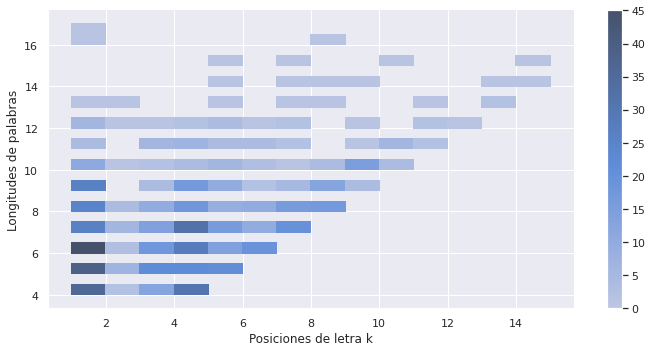

In [63]:
present_central_tendencies(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posición')
present_letter_position_dist(pd.DataFrame(k_positions), 'k')
print("\n")
present_dispersion_stats(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(k_positions), 'positions', 'Posiciones de letra k', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(k_positions), 'Posiciones de letra k')

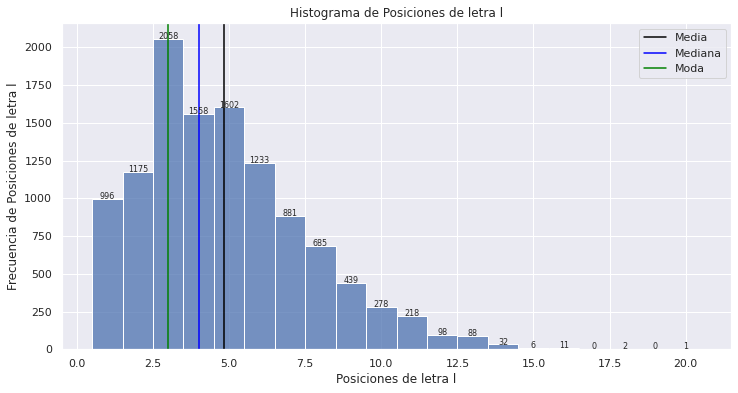

La media de Posiciones de letra l es: 4.8434116715077895 posición
La mediana de Posiciones de letra l es: 4.0 posición
La moda de Posiciones de letra l es: 3 posición




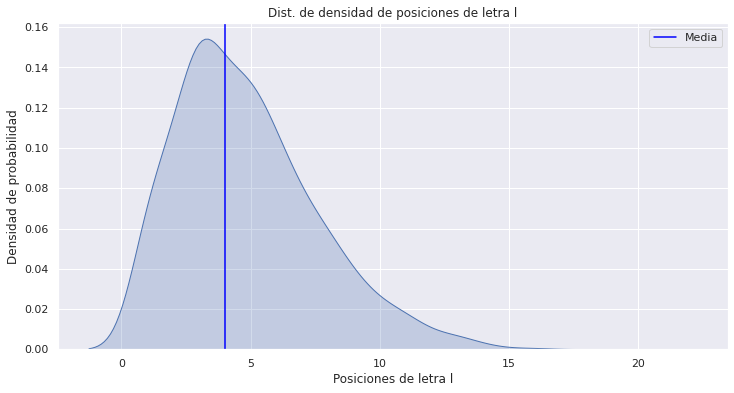



El rango de Posiciones de letra l es de: 19 [1 a 20] posiciones
La varianza de Posiciones de letra l es: 7.4189269750561 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra l es: 2.7237707273293212 posiciones




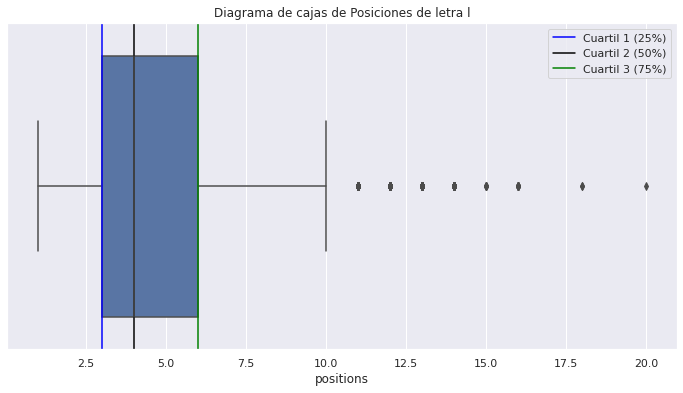

El cuartil 1 de Posiciones de letra l es: 3.0 posición
El cuartil 2 de Posiciones de letra l es: 4.0 posición
El cuartil 3 de Posiciones de letra l es: 6.0 posición




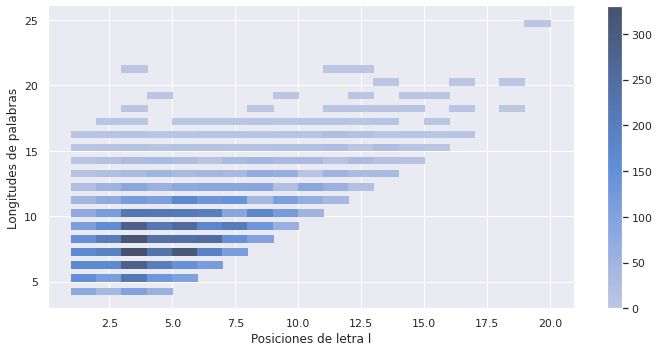

In [64]:
present_central_tendencies(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posición')
present_letter_position_dist(pd.DataFrame(l_positions), 'l')
print("\n")
present_dispersion_stats(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(l_positions), 'positions', 'Posiciones de letra l', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(l_positions), 'Posiciones de letra l')

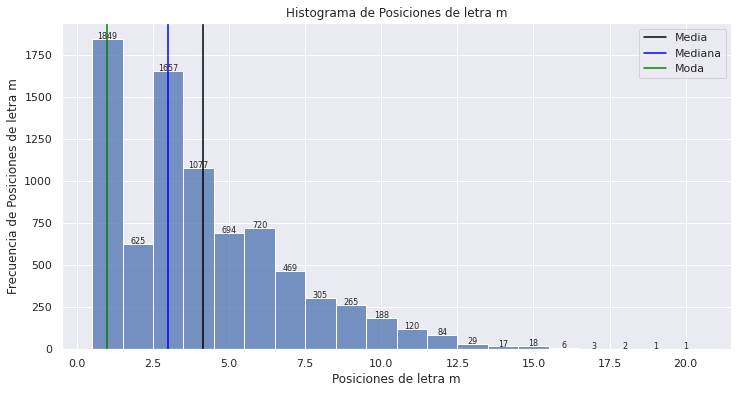

La media de Posiciones de letra m es: 4.131734317343174 posición
La mediana de Posiciones de letra m es: 3.0 posición
La moda de Posiciones de letra m es: 1 posición




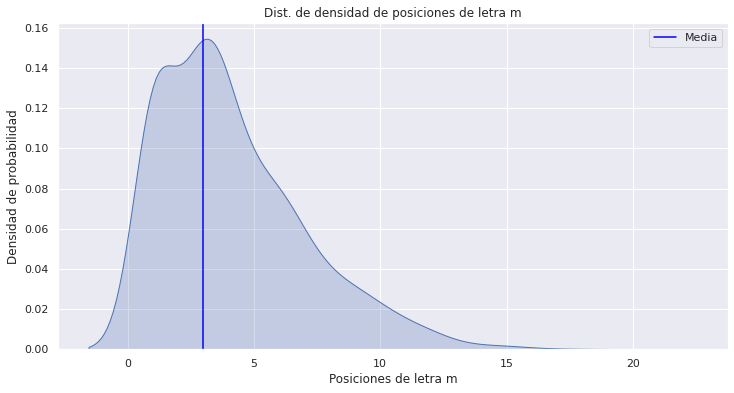



El rango de Posiciones de letra m es de: 19 [1 a 20] posiciones
La varianza de Posiciones de letra m es: 8.173666979843231 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra m es: 2.8589625705565354 posiciones




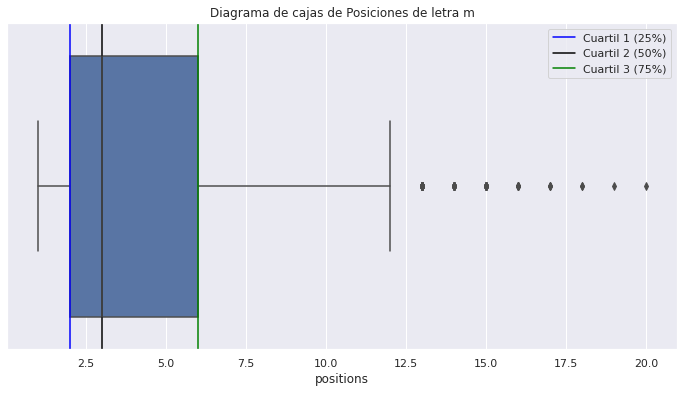

El cuartil 1 de Posiciones de letra m es: 2.0 posición
El cuartil 2 de Posiciones de letra m es: 3.0 posición
El cuartil 3 de Posiciones de letra m es: 6.0 posición




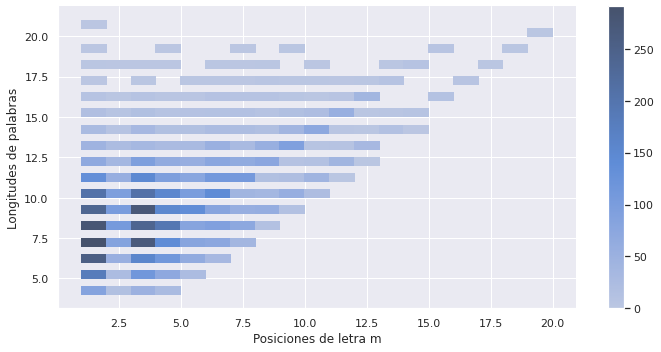

In [65]:
present_central_tendencies(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posición')
present_letter_position_dist(pd.DataFrame(m_positions), 'm')
print("\n")
present_dispersion_stats(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(m_positions), 'positions', 'Posiciones de letra m', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(m_positions), 'Posiciones de letra m')

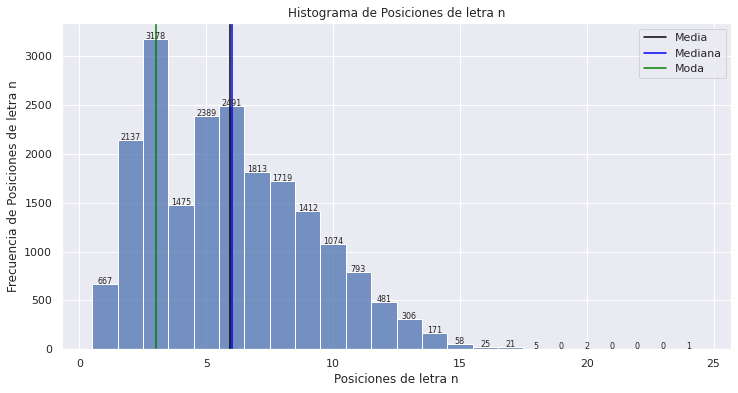

La media de Posiciones de letra n es: 5.925660302700564 posición
La mediana de Posiciones de letra n es: 6.0 posición
La moda de Posiciones de letra n es: 3 posición




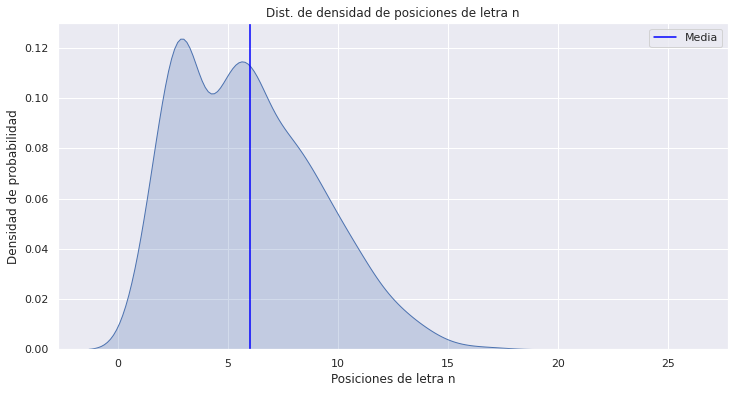



El rango de Posiciones de letra n es de: 23 [1 a 24] posiciones
La varianza de Posiciones de letra n es: 9.915979198484466 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra n es: 3.148964782033052 posiciones




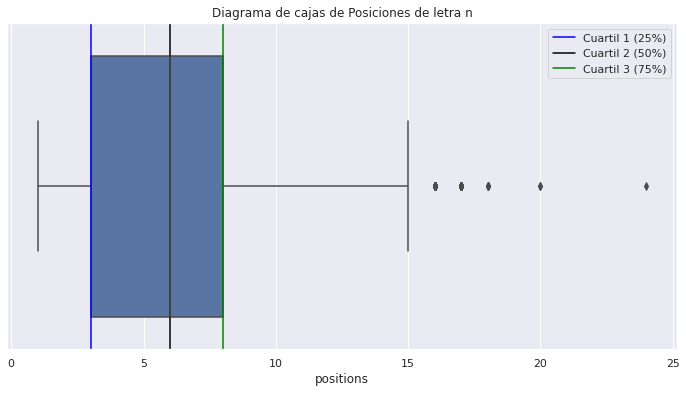

El cuartil 1 de Posiciones de letra n es: 3.0 posición
El cuartil 2 de Posiciones de letra n es: 6.0 posición
El cuartil 3 de Posiciones de letra n es: 8.0 posición




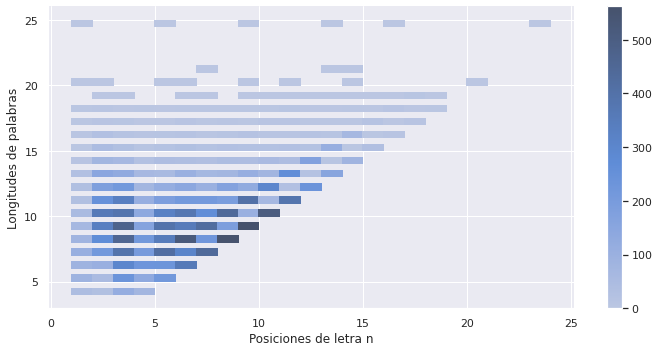

In [66]:
present_central_tendencies(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posición')
present_letter_position_dist(pd.DataFrame(n_positions), 'n')
print("\n")
present_dispersion_stats(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(n_positions), 'positions', 'Posiciones de letra n', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(n_positions), 'Posiciones de letra n')

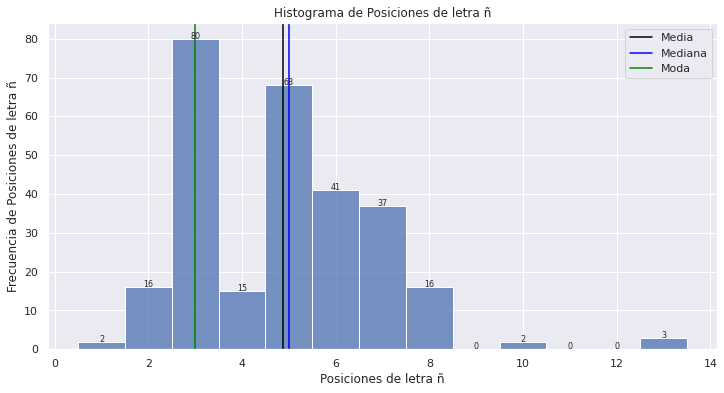

La media de Posiciones de letra ñ es: 4.878571428571429 posición
La mediana de Posiciones de letra ñ es: 5.0 posición
La moda de Posiciones de letra ñ es: 3 posición




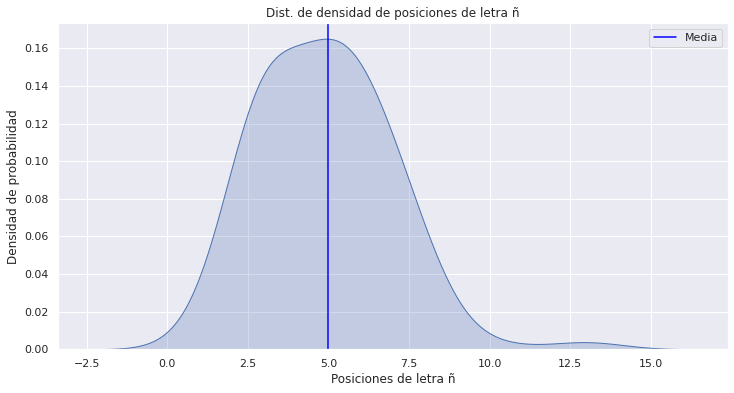



El rango de Posiciones de letra ñ es de: 12 [1 a 13] posiciones
La varianza de Posiciones de letra ñ es: 3.8638265306122452 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra ñ es: 1.965661855613077 posiciones




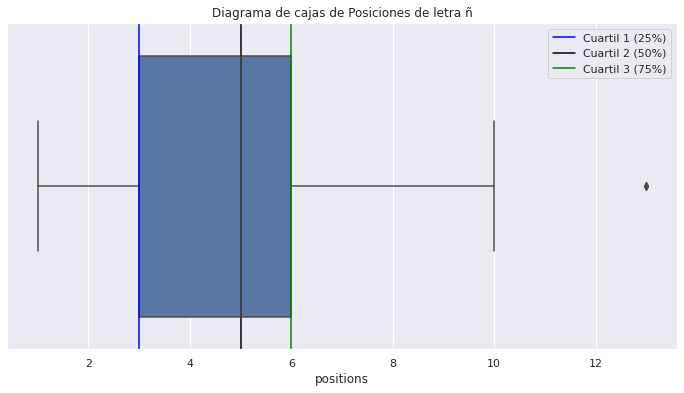

El cuartil 1 de Posiciones de letra ñ es: 3.0 posición
El cuartil 2 de Posiciones de letra ñ es: 5.0 posición
El cuartil 3 de Posiciones de letra ñ es: 6.0 posición




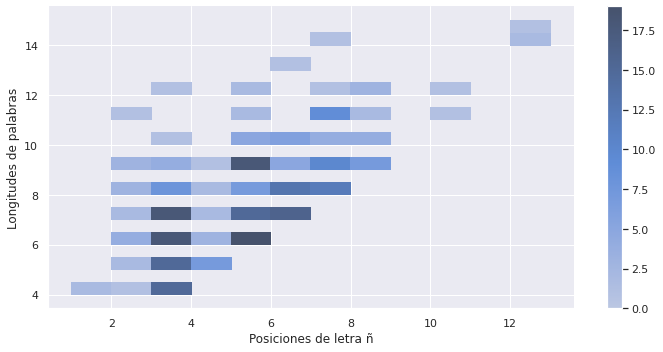

In [67]:
present_central_tendencies(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posición')
present_letter_position_dist(pd.DataFrame(ñ_positions), 'ñ')
print("\n")
present_dispersion_stats(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(ñ_positions), 'positions', 'Posiciones de letra ñ', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(ñ_positions), 'Posiciones de letra ñ')

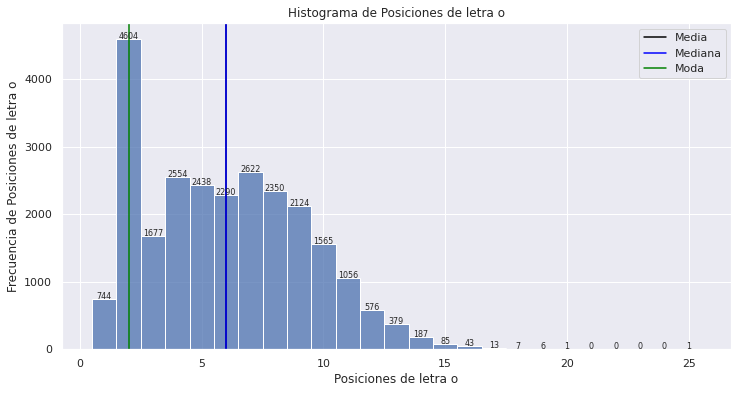

La media de Posiciones de letra o es: 5.9865334491746305 posición
La mediana de Posiciones de letra o es: 6.0 posición
La moda de Posiciones de letra o es: 2 posición




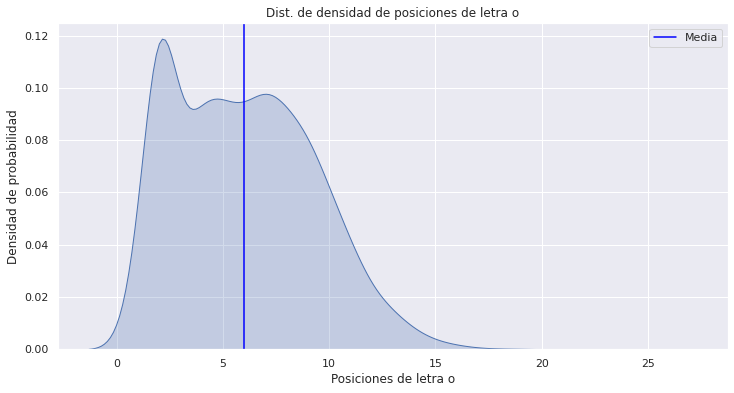



El rango de Posiciones de letra o es de: 24 [1 a 25] posiciones
La varianza de Posiciones de letra o es: 10.630929938637095 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra o es: 3.2605106867846785 posiciones




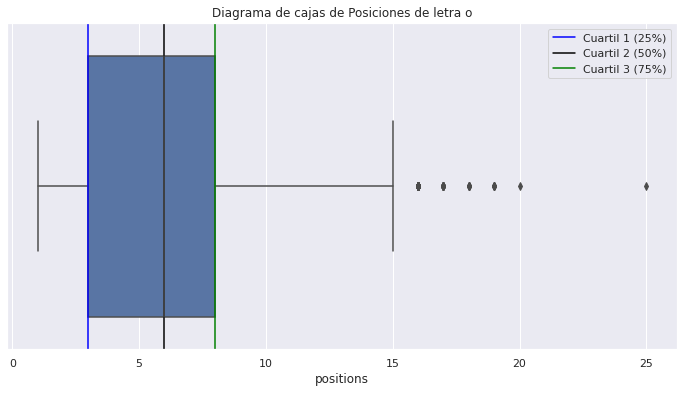

El cuartil 1 de Posiciones de letra o es: 3.0 posición
El cuartil 2 de Posiciones de letra o es: 6.0 posición
El cuartil 3 de Posiciones de letra o es: 8.0 posición




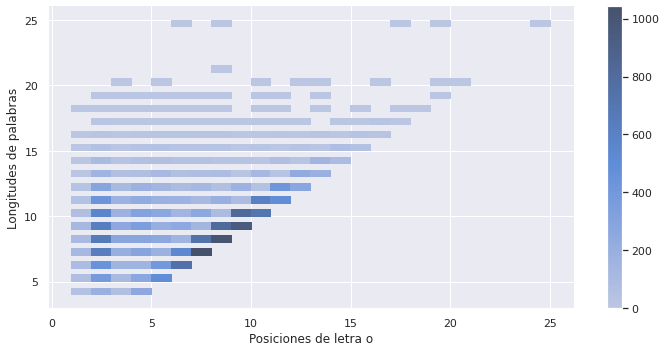

In [68]:
present_central_tendencies(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posición')
present_letter_position_dist(pd.DataFrame(o_positions), 'o')
print("\n")
present_dispersion_stats(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(o_positions), 'positions', 'Posiciones de letra o', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(o_positions), 'Posiciones de letra o')

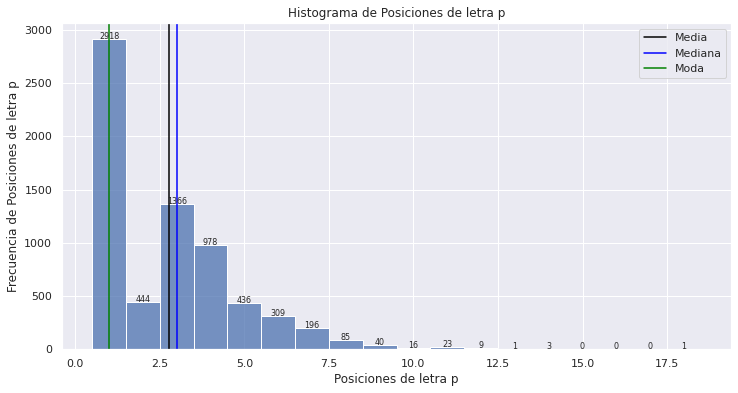

La media de Posiciones de letra p es: 2.7627838827838826 posición
La mediana de Posiciones de letra p es: 3.0 posición
La moda de Posiciones de letra p es: 1 posición




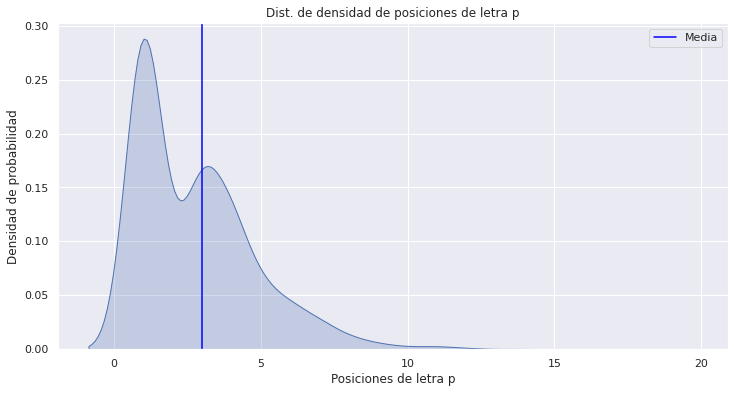



El rango de Posiciones de letra p es de: 17 [1 a 18] posiciones
La varianza de Posiciones de letra p es: 4.045266975271371 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra p es: 2.0112849065389447 posiciones




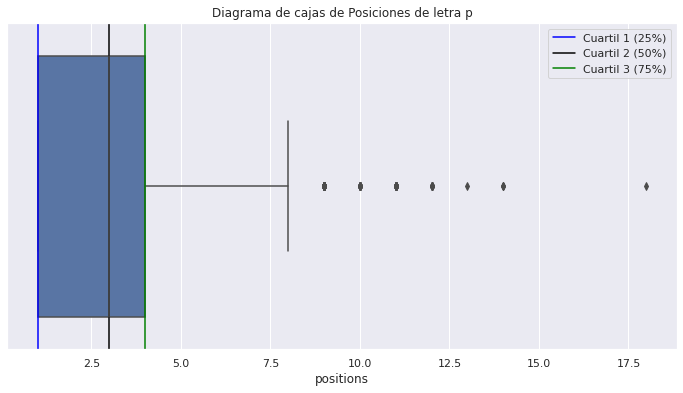

El cuartil 1 de Posiciones de letra p es: 1.0 posición
El cuartil 2 de Posiciones de letra p es: 3.0 posición
El cuartil 3 de Posiciones de letra p es: 4.0 posición




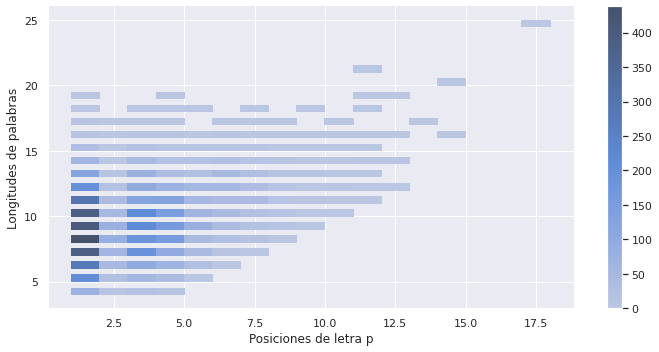

In [69]:
present_central_tendencies(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posición')
present_letter_position_dist(pd.DataFrame(p_positions), 'p')
print("\n")
present_dispersion_stats(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(p_positions), 'positions', 'Posiciones de letra p', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(p_positions), 'Posiciones de letra p')

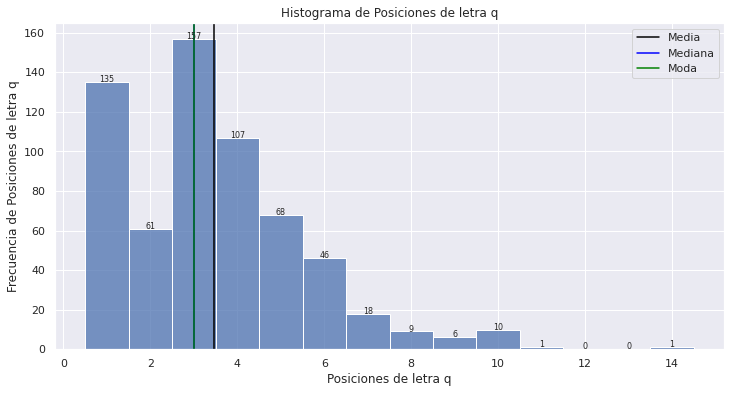

La media de Posiciones de letra q es: 3.47172859450727 posición
La mediana de Posiciones de letra q es: 3.0 posición
La moda de Posiciones de letra q es: 3 posición




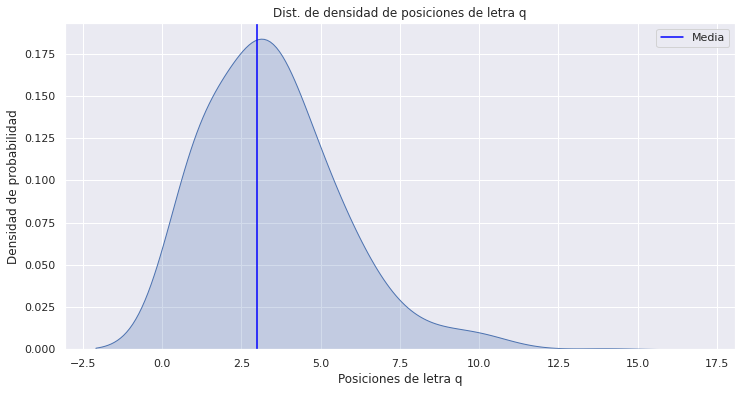



El rango de Posiciones de letra q es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra q es: 4.297665994190431 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra q es: 2.0730812801697938 posiciones




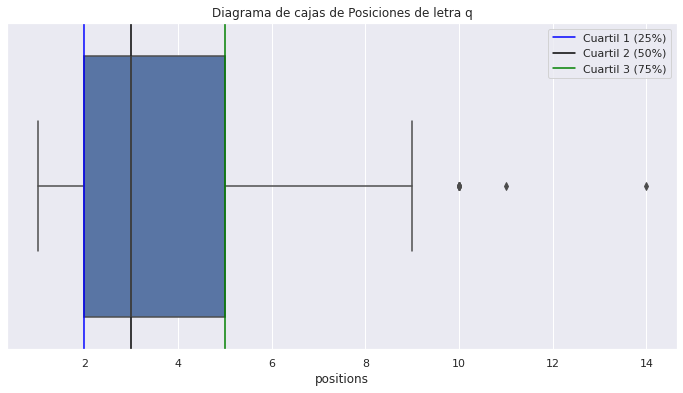

El cuartil 1 de Posiciones de letra q es: 2.0 posición
El cuartil 2 de Posiciones de letra q es: 3.0 posición
El cuartil 3 de Posiciones de letra q es: 5.0 posición




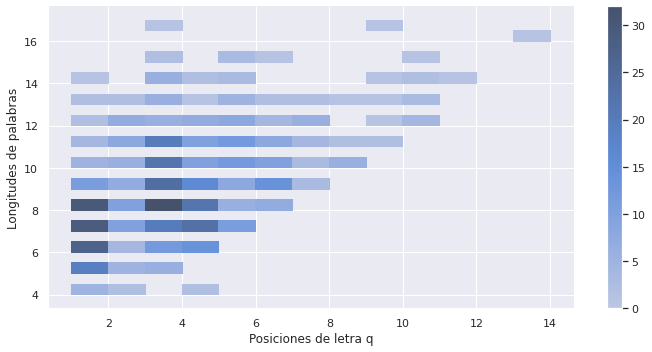

In [70]:
present_central_tendencies(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posición')
present_letter_position_dist(pd.DataFrame(q_positions), 'q')
print("\n")
present_dispersion_stats(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(q_positions), 'positions', 'Posiciones de letra q', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(q_positions), 'Posiciones de letra q')

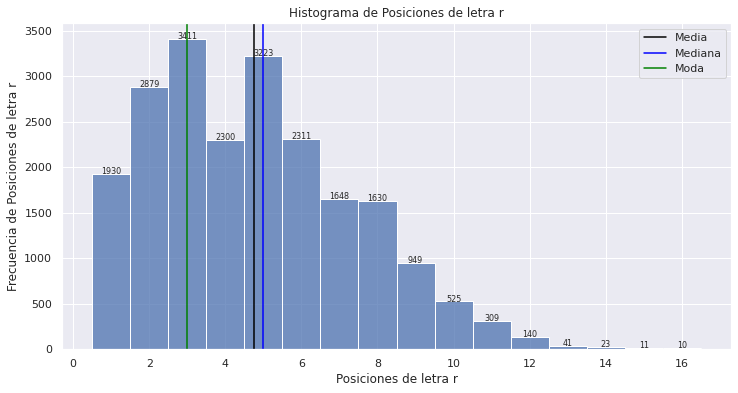

La media de Posiciones de letra r es: 4.7670103092783505 posición
La mediana de Posiciones de letra r es: 5.0 posición
La moda de Posiciones de letra r es: 3 posición




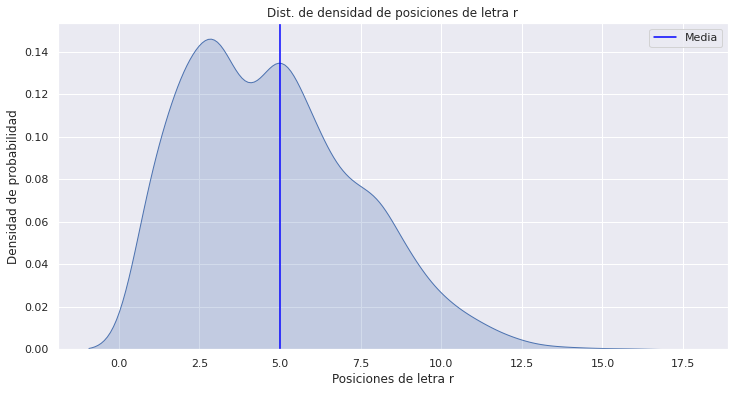



El rango de Posiciones de letra r es de: 15 [1 a 16] posiciones
La varianza de Posiciones de letra r es: 6.946559290427927 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra r es: 2.635632616740794 posiciones




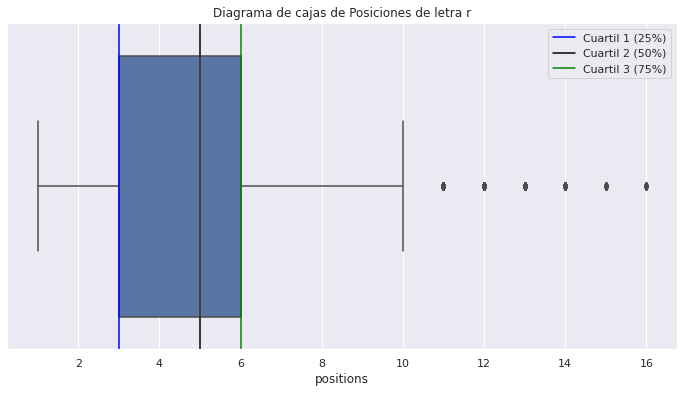

El cuartil 1 de Posiciones de letra r es: 3.0 posición
El cuartil 2 de Posiciones de letra r es: 5.0 posición
El cuartil 3 de Posiciones de letra r es: 6.0 posición




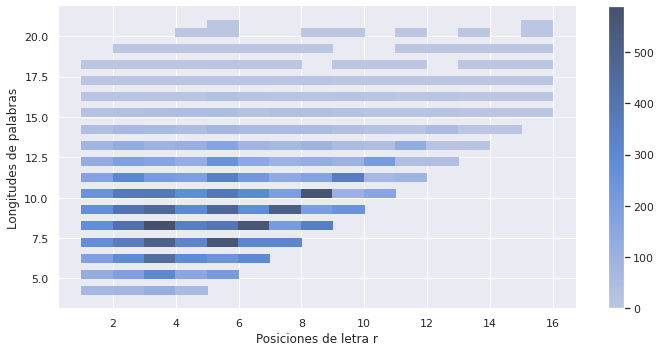

In [71]:
present_central_tendencies(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posición')
present_letter_position_dist(pd.DataFrame(r_positions), 'r')
print("\n")
present_dispersion_stats(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(r_positions), 'positions', 'Posiciones de letra r', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(r_positions), 'Posiciones de letra r')

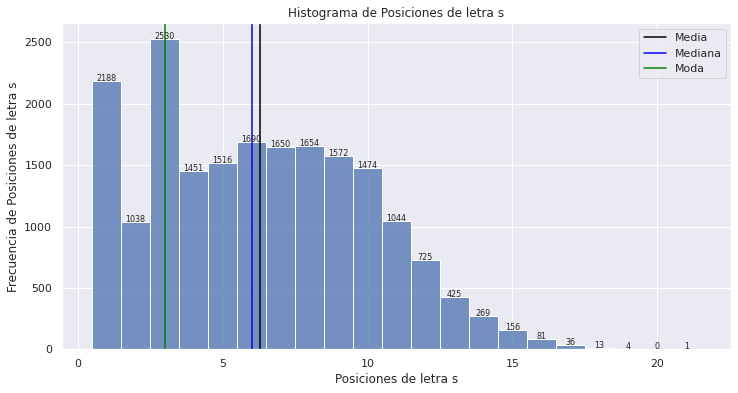

La media de Posiciones de letra s es: 6.307424296766921 posición
La mediana de Posiciones de letra s es: 6.0 posición
La moda de Posiciones de letra s es: 3 posición




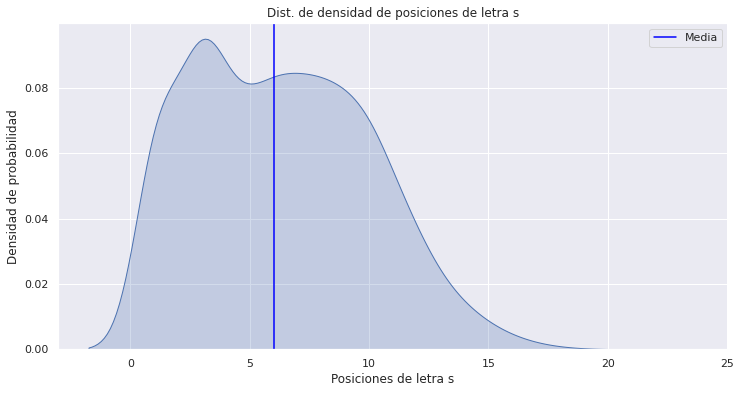



El rango de Posiciones de letra s es de: 20 [1 a 21] posiciones
La varianza de Posiciones de letra s es: 13.509117908459215 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra s es: 3.675475194918232 posiciones




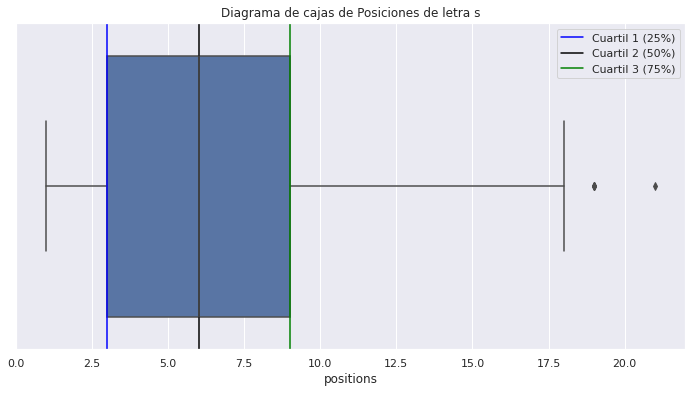

El cuartil 1 de Posiciones de letra s es: 3.0 posición
El cuartil 2 de Posiciones de letra s es: 6.0 posición
El cuartil 3 de Posiciones de letra s es: 9.0 posición




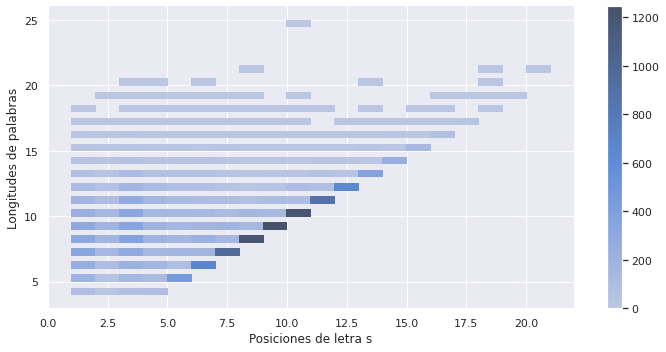

In [72]:
present_central_tendencies(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posición')
present_letter_position_dist(pd.DataFrame(s_positions), 's')
print("\n")
present_dispersion_stats(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(s_positions), 'positions', 'Posiciones de letra s', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(s_positions), 'Posiciones de letra s')

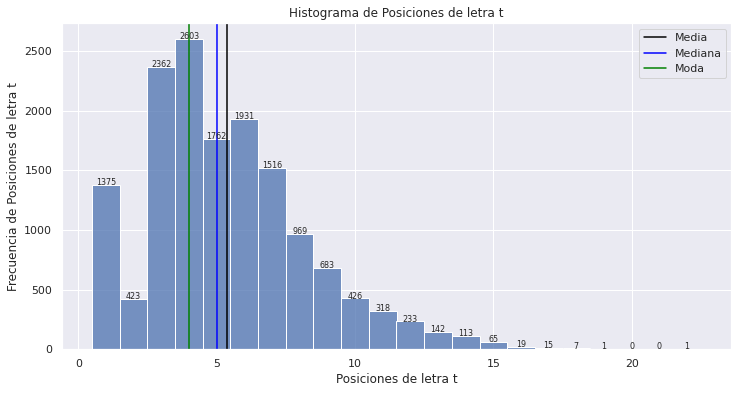

La media de Posiciones de letra t es: 5.366813686180166 posición
La mediana de Posiciones de letra t es: 5.0 posición
La moda de Posiciones de letra t es: 4 posición




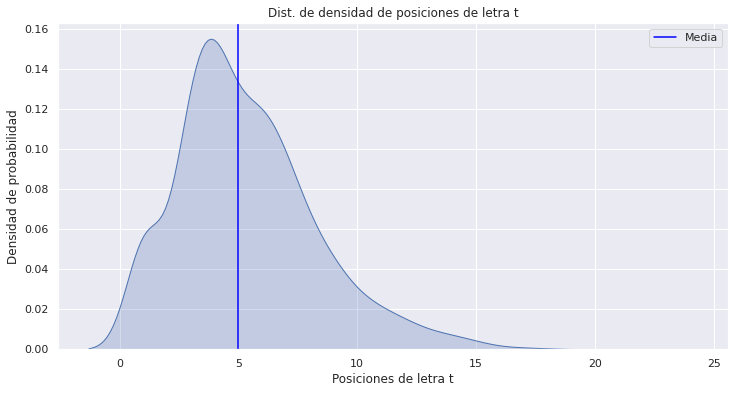



El rango de Posiciones de letra t es de: 21 [1 a 22] posiciones
La varianza de Posiciones de letra t es: 8.545279315460911 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra t es: 2.923230971965936 posiciones




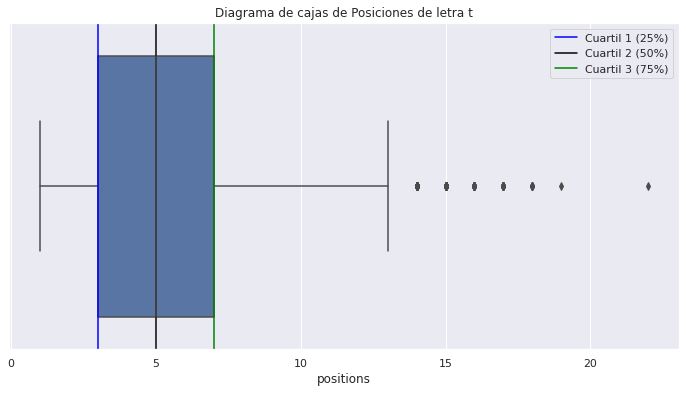

El cuartil 1 de Posiciones de letra t es: 3.0 posición
El cuartil 2 de Posiciones de letra t es: 5.0 posición
El cuartil 3 de Posiciones de letra t es: 7.0 posición




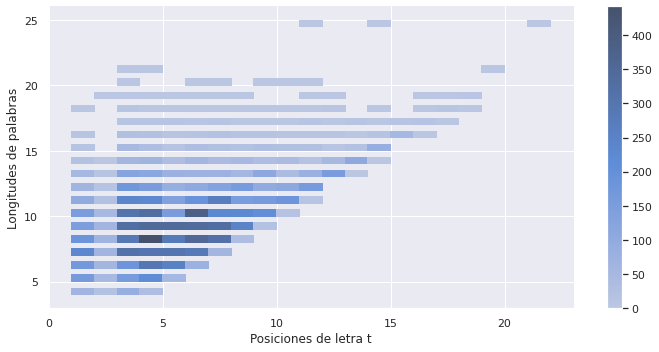

In [73]:
present_central_tendencies(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posición')
present_letter_position_dist(pd.DataFrame(t_positions), 't')
print("\n")
present_dispersion_stats(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(t_positions), 'positions', 'Posiciones de letra t', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(t_positions), 'Posiciones de letra t')

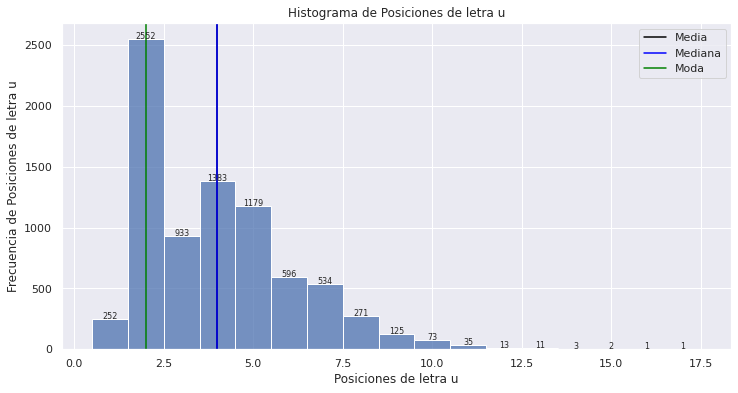

La media de Posiciones de letra u es: 3.981416373681567 posición
La mediana de Posiciones de letra u es: 4.0 posición
La moda de Posiciones de letra u es: 2 posición




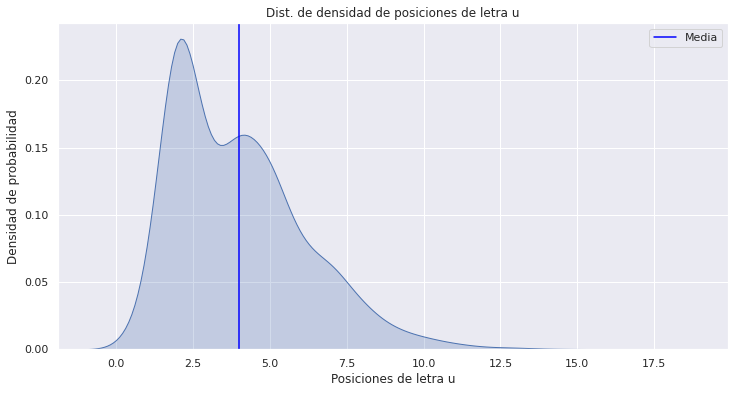



El rango de Posiciones de letra u es de: 16 [1 a 17] posiciones
La varianza de Posiciones de letra u es: 4.540086592579718 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra u es: 2.1307478951250234 posiciones




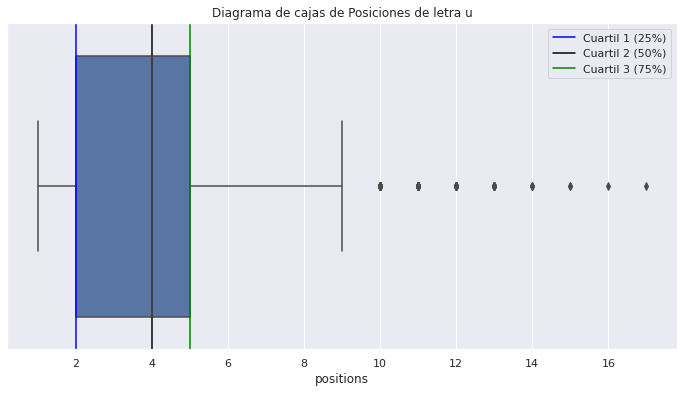

El cuartil 1 de Posiciones de letra u es: 2.0 posición
El cuartil 2 de Posiciones de letra u es: 4.0 posición
El cuartil 3 de Posiciones de letra u es: 5.0 posición




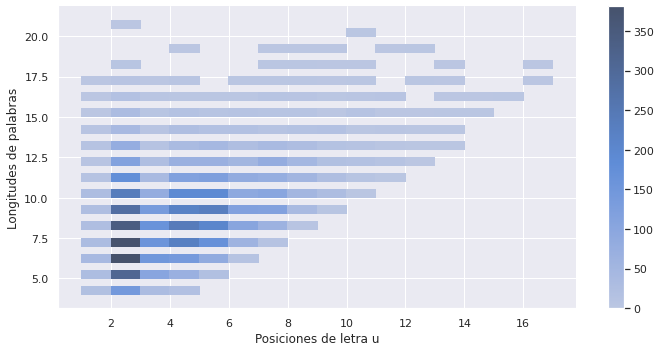

In [74]:
present_central_tendencies(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posición')
present_letter_position_dist(pd.DataFrame(u_positions), 'u')
print("\n")
present_dispersion_stats(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(u_positions), 'positions', 'Posiciones de letra u', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(u_positions), 'Posiciones de letra u')

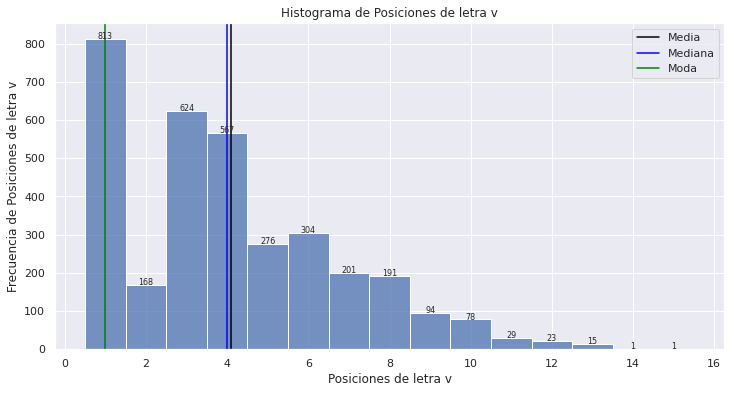

La media de Posiciones de letra v es: 4.098375184638109 posición
La mediana de Posiciones de letra v es: 4.0 posición
La moda de Posiciones de letra v es: 1 posición




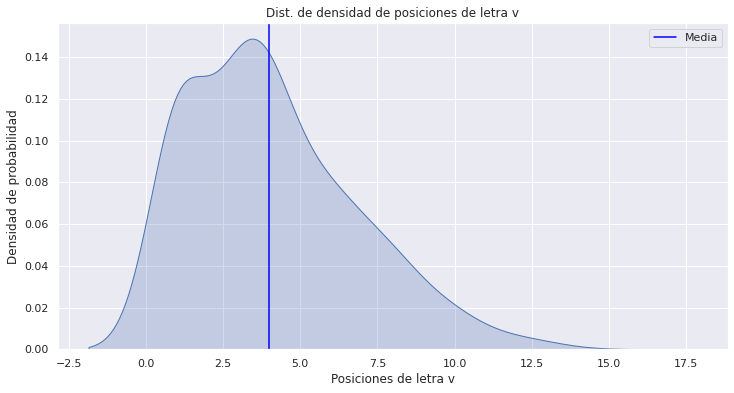



El rango de Posiciones de letra v es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra v es: 7.215433105913002 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra v es: 2.686155823088639 posiciones




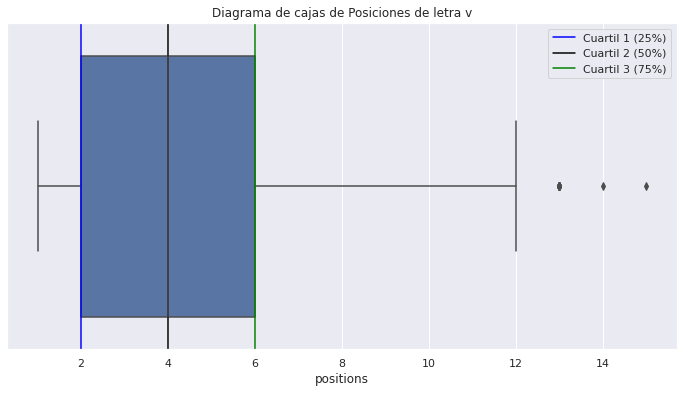

El cuartil 1 de Posiciones de letra v es: 2.0 posición
El cuartil 2 de Posiciones de letra v es: 4.0 posición
El cuartil 3 de Posiciones de letra v es: 6.0 posición




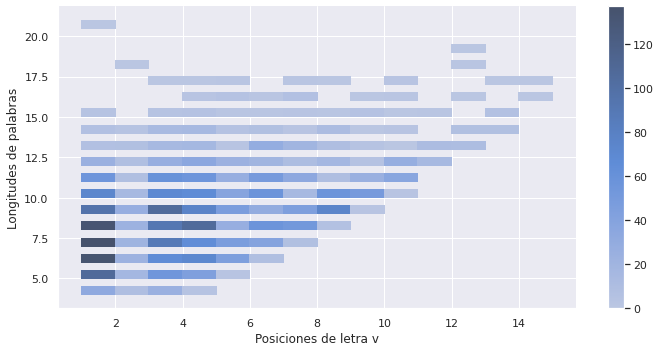

In [75]:
present_central_tendencies(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posición')
present_letter_position_dist(pd.DataFrame(v_positions), 'v')
print("\n")
present_dispersion_stats(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(v_positions), 'positions', 'Posiciones de letra v', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(v_positions), 'Posiciones de letra v')

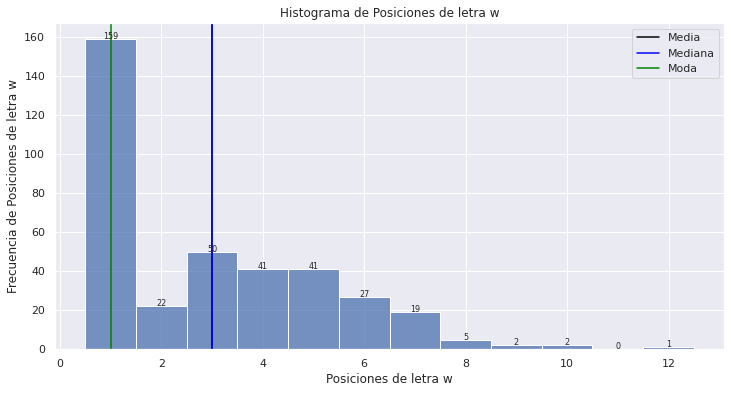

La media de Posiciones de letra w es: 3.0 posición
La mediana de Posiciones de letra w es: 3.0 posición
La moda de Posiciones de letra w es: 1 posición




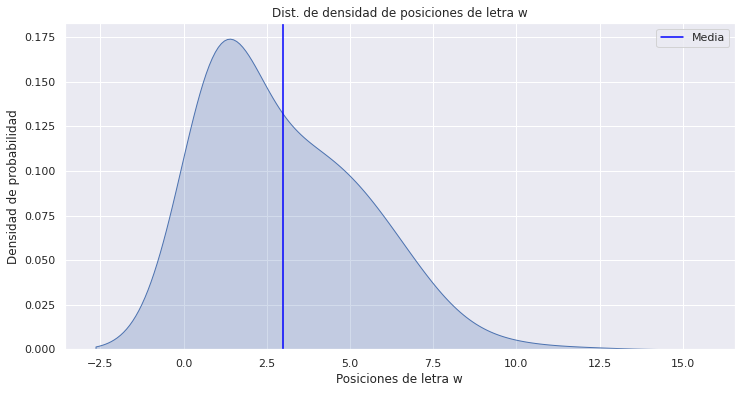



El rango de Posiciones de letra w es de: 11 [1 a 12] posiciones
La varianza de Posiciones de letra w es: 4.840108401084011 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra w es: 2.200024636472058 posiciones




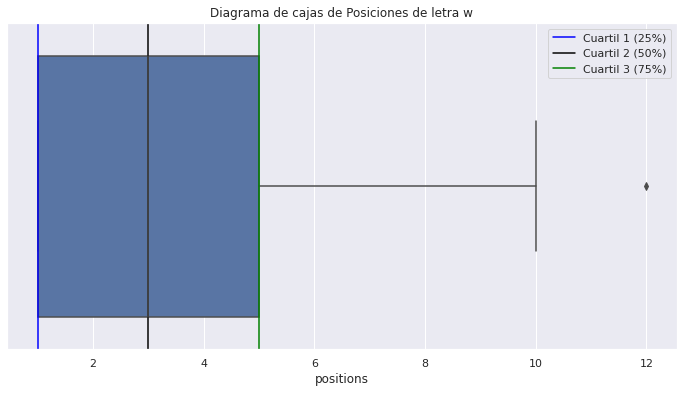

El cuartil 1 de Posiciones de letra w es: 1.0 posición
El cuartil 2 de Posiciones de letra w es: 3.0 posición
El cuartil 3 de Posiciones de letra w es: 5.0 posición




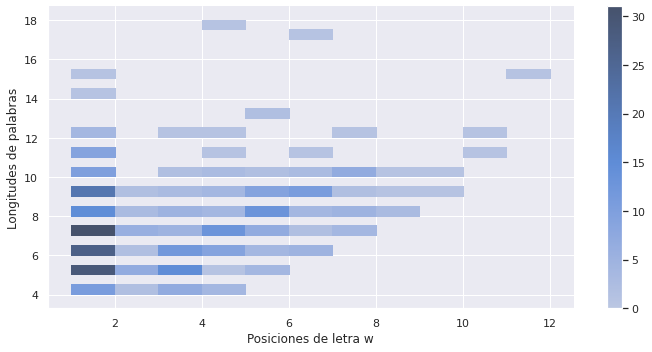

In [76]:
present_central_tendencies(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posición')
present_letter_position_dist(pd.DataFrame(w_positions), 'w')
print("\n")
present_dispersion_stats(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(w_positions), 'positions', 'Posiciones de letra w', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(w_positions), 'Posiciones de letra w')

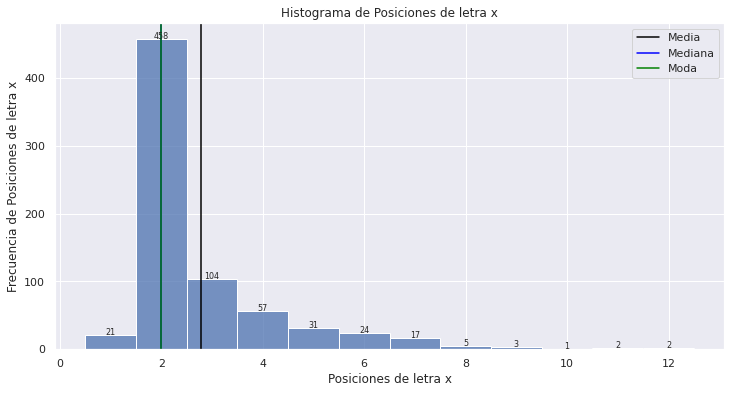

La media de Posiciones de letra x es: 2.783448275862069 posición
La mediana de Posiciones de letra x es: 2.0 posición
La moda de Posiciones de letra x es: 2 posición




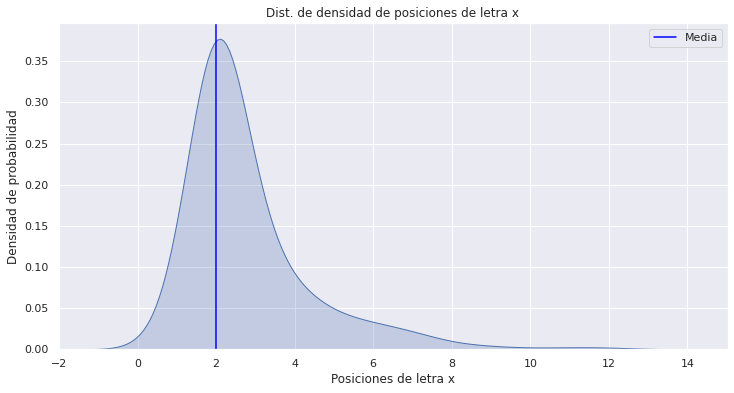



El rango de Posiciones de letra x es de: 11 [1 a 12] posiciones
La varianza de Posiciones de letra x es: 2.4124156956004756 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra x es: 1.5531953179173814 posiciones




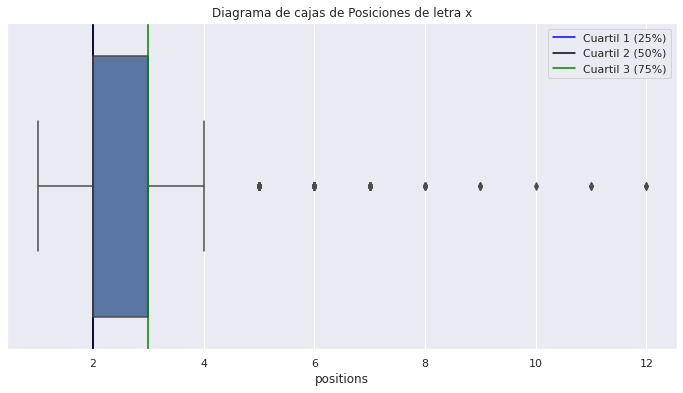

El cuartil 1 de Posiciones de letra x es: 2.0 posición
El cuartil 2 de Posiciones de letra x es: 2.0 posición
El cuartil 3 de Posiciones de letra x es: 3.0 posición




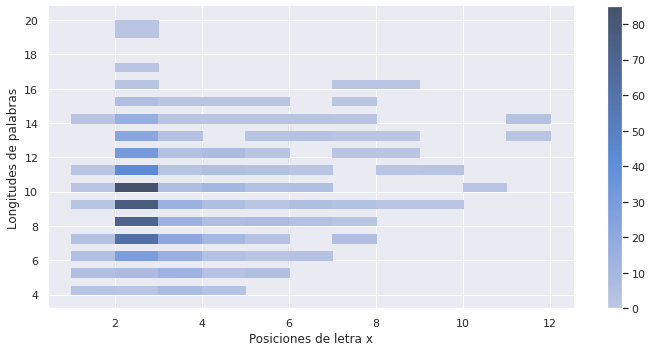

In [77]:
present_central_tendencies(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posición')
present_letter_position_dist(pd.DataFrame(x_positions), 'x')
print("\n")
present_dispersion_stats(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(x_positions), 'positions', 'Posiciones de letra x', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(x_positions), 'Posiciones de letra x')

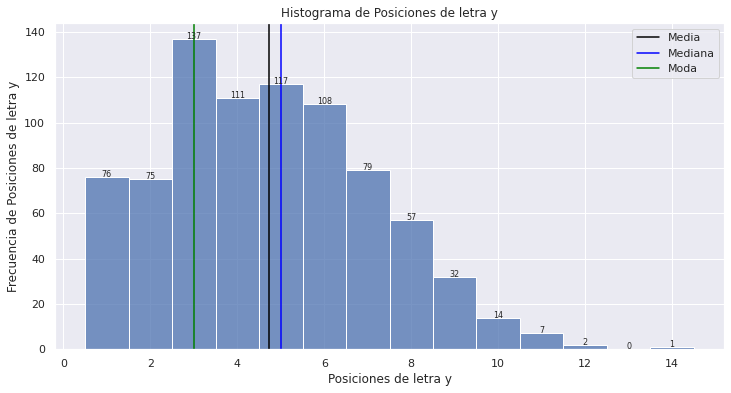

La media de Posiciones de letra y es: 4.737745098039215 posición
La mediana de Posiciones de letra y es: 5.0 posición
La moda de Posiciones de letra y es: 3 posición




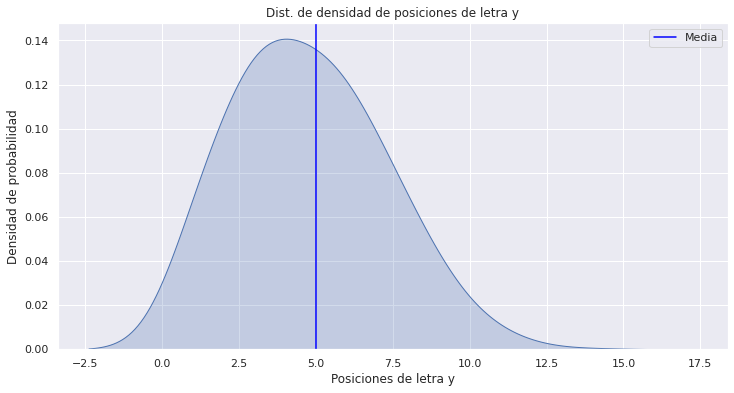



El rango de Posiciones de letra y es de: 13 [1 a 14] posiciones
La varianza de Posiciones de letra y es: 5.789065503652441 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra y es: 2.406047693553152 posiciones




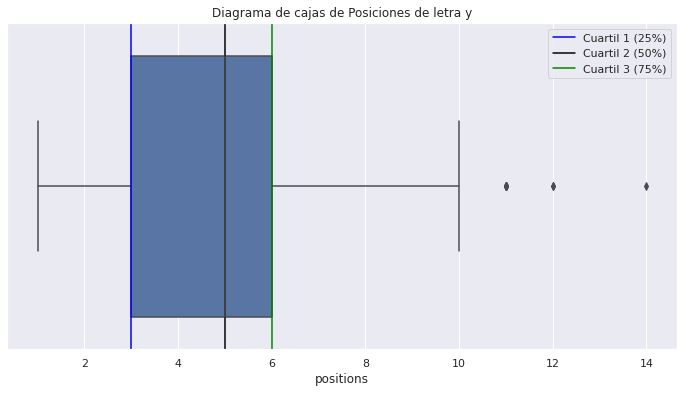

El cuartil 1 de Posiciones de letra y es: 3.0 posición
El cuartil 2 de Posiciones de letra y es: 5.0 posición
El cuartil 3 de Posiciones de letra y es: 6.0 posición




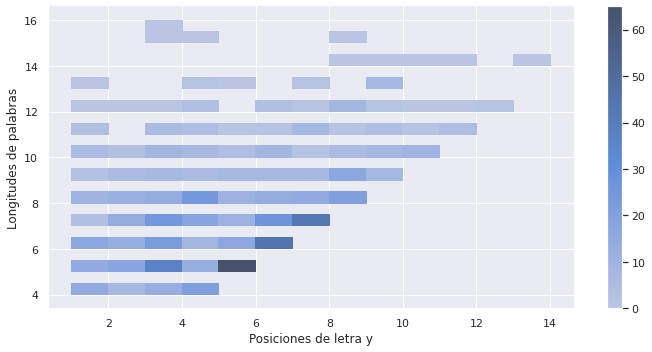

In [78]:
present_central_tendencies(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posición')
present_letter_position_dist(pd.DataFrame(y_positions), 'y')
print("\n")
present_dispersion_stats(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(y_positions), 'positions', 'Posiciones de letra y', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(y_positions), 'Posiciones de letra y')

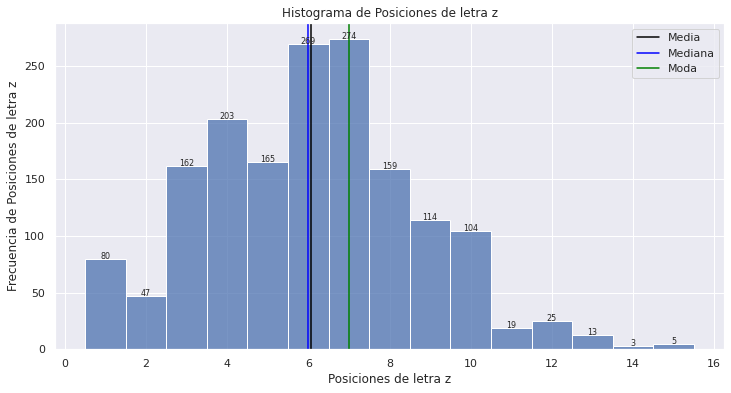

La media de Posiciones de letra z es: 6.066991473812424 posición
La mediana de Posiciones de letra z es: 6.0 posición
La moda de Posiciones de letra z es: 7 posición




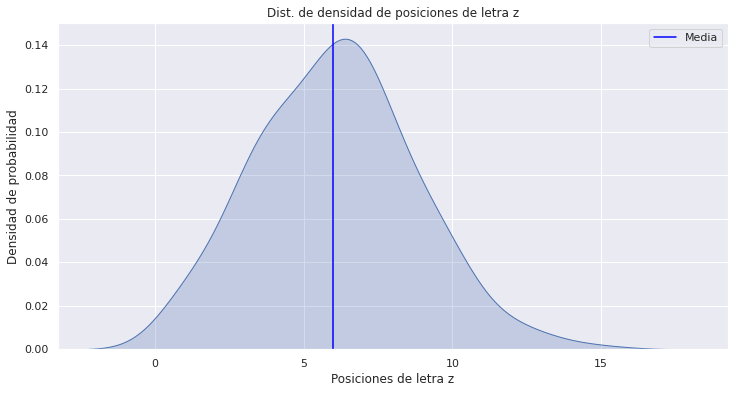



El rango de Posiciones de letra z es de: 14 [1 a 15] posiciones
La varianza de Posiciones de letra z es: 6.935828829403552 posiciones cuadrados/cuadradas
La desviación estándar de Posiciones de letra z es: 2.633596178119104 posiciones




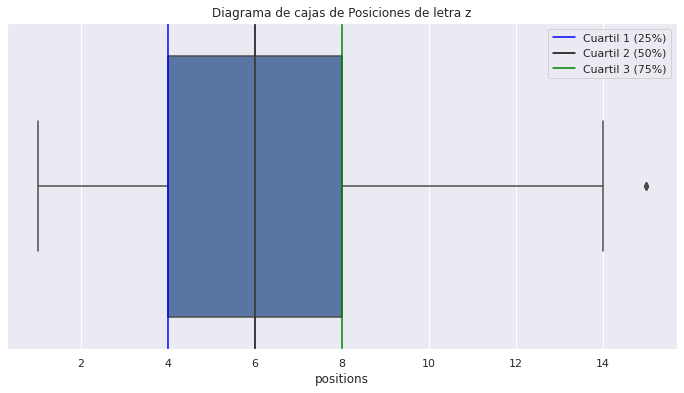

El cuartil 1 de Posiciones de letra z es: 4.0 posición
El cuartil 2 de Posiciones de letra z es: 6.0 posición
El cuartil 3 de Posiciones de letra z es: 8.0 posición




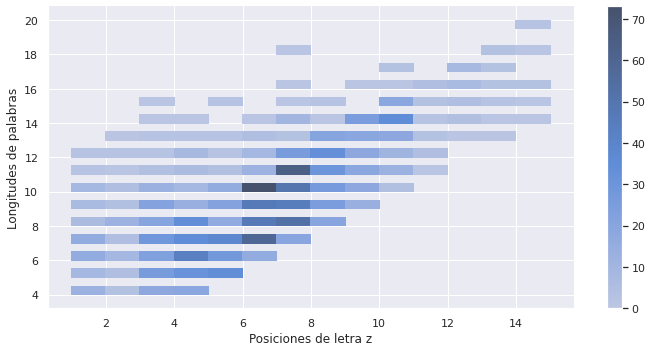

In [79]:
present_central_tendencies(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posición')
present_letter_position_dist(pd.DataFrame(z_positions), 'z')
print("\n")
present_dispersion_stats(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posiciones')
print("\n")
present_position_stats(pd.DataFrame(z_positions), 'positions', 'Posiciones de letra z', 'posición')
print("\n")
present_position_by_length(pd.DataFrame(z_positions), 'Posiciones de letra z')

##CONCLUSIONES:
* Generalmente se percibieron diferencias en las frecuencias, posiciones, y las relaciones entre estas variables, para las letras del alfabeto español
* Se identificaron relaciones lineales positivas, y fuertes entre las cantidades de vocales y consonantes con la longitud de las palabras. Indicativo de la buena calidad de los datos.
* Mapas de densidad entre posiciones, frecuencias y longitudes de palabras permite evidenciar visualmente posiciones más frecuentes para letras y longitudes. Estos patrones son generalmente únicos por letra.
* Los hallazgos anteriores lleva a una estrategia básica y eficiente de predicción de vocablos en el juego Wordle: es posible determinar qué letra es más probable que se encuentre en posiciones desconocidas, dada una longitud. (Recordar distribuciones de pos./Longitud)
* Se pueden calificar las palabras potenciales de acuerdo a cuáles concuerden más con las letras más probables en posiciones desconocidas.

##Próximos hitos:
* Establecer una estrategia de calificación de palabras del banco, dada una longitud, y posiciones sin letras adivinadas.
* Integrar esto a un proceso iterativo como primera versión de sistema predictor de Wordle.